# Spaceship Titanic Dataset
#### Dataset available on Kaggle Competitions ar https://www.kaggle.com/competitions/spaceship-titanic

"Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!" (Text from Kaggle website)

### 1. Importing the libraries that will be used in the project and the dataset, file "train.csv"
Kaggle disponibilezes two files using CSV format. The train.csv is the main dataset the we're using to create the model. The test.csv file will be used to evaluate the model at the final stage.

In [1]:
# Import necessary libraries for data manipulation, visualization, and generating fake data
import pandas as pd          # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib for creating visualizations
import missingno             # Missingno for visualizing missing data patterns
import seaborn as sns        # Seaborn for statistical data visualization
import numpy as np           # NumPy for numerical operations
import csv                   # CSV for reading and writing CSV files
from faker import Faker     # Faker for generating fake data
from wordcloud import WordCloud  # WordCloud for creating word clouds
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Note: Ensure you have installed all required libraries before running the code.
# on Colab it´s necessary to install some libraries using like faker: !pip install faker


# Using train data from https://www.kaggle.com/competitions/spaceship-titanic/
url = 'https://storage.googleapis.com/kagglesdsdata/competitions/34377/3220602/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1699829712&Signature=diq%2BUQvZ%2F%2F3ZcgznL05CrAc0iGD3viUbB6ATdsLFbbzir7cZq1AXXIKrwCnc2RkF2KPtHjvUxvx7uH7xmCnxACyBQxxI1dIVyAJmEgaVqD2hHZp259c%2BhMOeFvgE4vzxdXs23y0WtAVyUqUtC7WN81NU97m1OKCL534R%2FRaLEFjqlnNntasbjFYlWLdpUVisqMFGv8Gw2vPsVIZ1LJpXfoFYDNDqc0VlxFOZkZiJm91mSTX8b7ZOzf1l9ZZUDLFmhjvD1kthIMZ9CgH1Z3Dax%2FtdcD8otbvVi9qhZt3se3UXAGkf1m9nEbOSv6yDHzhzMukwZZrvsQ2WdYIcwa%2Fiiw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv'
# kaggle competitions download -c spaceship-titanic
#file_path = 'train.csv'
base = pd.read_csv(url)
base.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### 2. Univariate Data Analysis

#### 2.1 Data Summary

There are 8693 passengers listed in the train.csv file. The category PassengerId is available for all passengers and it encodes the family and individual number. Homeplanet have three possibilities, and it designates the origin planet of the individual. CryoSleep is binary and tells if the passenger is in cryogenic sleep. Cabin encodes the room used by the passenger. It encodes the information about the corridor and the room number in a string. Destination is the desired destination planet. Age is the age of the passenger, and goes from 0 to 79 (oldest passenger). VIP columns informs if the passenger payed for VIP services on board, and can assume values Ture or False,. RommService, foodCourt, ShoppingMall, Spa and VRDeck captures the amount of money the passenger has expent in such amenities. Name is the name and surname of the passenger; and the last columns tells us if the passenger was caught in the disaster, it's boolean, and it is the goal of this project to predict this outcome.

In [2]:
summary = base.describe(include='all')
summary.head(15)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


#### 2.2. Check for Missing data

In [3]:
#list missing values in the dataframe
# missing_values = base.isnull()
# Total number of rows in the dataset
total_rows = len(base)
total_missing_values = base.isnull().sum().sum()
print(f"Missing values in entire DataFrame:{total_missing_values}")
print("Number of rows in the dataset: {total_rows}")
print(f"{total_missing_values/total_rows:.2f}% missing")

Missing values in entire DataFrame:2324
Number of rows in the dataset: {total_rows}
0.27% missing


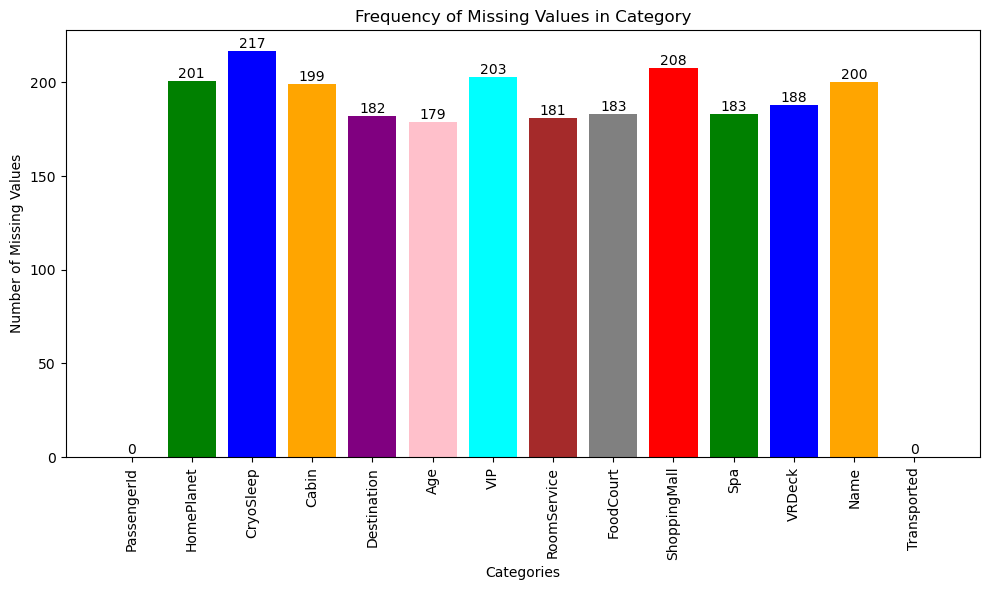

In [4]:
## Dictionary to store column names as keys and corresponding missing values count as values
missing_values_dict = {}

# Iterate through each column and find missing values
for column in base.columns:
    missing_values_count = base[column].isnull().sum()
    missing_values_dict[column] = missing_values_count

# Create lists for column names and missing values counts
columns = list(missing_values_dict.keys())
missing_counts = list(missing_values_dict.values())

# Define distinctive colors for each bar
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'cyan', 'brown', 'gray']

# Create a bar chart with distinctive colors and frequency labels on top of each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(columns, missing_counts, color=colors)
plt.xlabel('Categories')
plt.ylabel('Number of Missing Values')
plt.title('Frequency of Missing Values in Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Add frequency labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [5]:
# Drop the first and last column from the missing_counts list
columns_to_exclude = ['PassengerId', 'Transported']  # Replace with actual column names
filtered_missing_counts = [count for column, count in zip(columns, missing_counts) if column not in columns_to_exclude]

# Calculate mean and standard deviation of filtered missing data counts
mean_missing_count = np.mean(filtered_missing_counts)
std_dev_missing_count = np.std(filtered_missing_counts)

# Calculate missing value percentages for each column
missing_percentage_dict = {}
for column in base.columns:
    missing_values_count = base[column].isnull().sum()
    missing_percentage = (missing_values_count / total_rows) * 100
    missing_percentage_dict[column] = missing_percentage

filtered_missing_percentage = {column: percentage for column, percentage in missing_percentage_dict.items() if column not in columns_to_exclude}

# Calculate mean and standard deviation of missing value percentages
mean_missing_percentage = np.mean(list(filtered_missing_percentage.values()))
std_dev_missing_percentage = np.std(list(filtered_missing_percentage.values()))

# Display statistics as text
print(f"Mean of missing data counts (excluding first and last columns): {mean_missing_count:.2f} ~ {mean_missing_percentage:.2f}%")
print(f"Standard Deviation of missing data counts (excluding first and last columns): {std_dev_missing_count:.2f} ~ {std_dev_missing_percentage:.2f}%")




Mean of missing data counts (excluding first and last columns): 193.67 ~ 2.23%
Standard Deviation of missing data counts (excluding first and last columns): 12.01 ~ 0.14%


#### Missing Values

There are a total of 2324 missing values in the dataset, represented as NaN values. All Transported and PassengerId values are present. The mean number of missing values in each category that contains missing values is 193.67, constituting about 2.23% of the data in those categories, with a standard deviation of 12. CryoSleep has the highest number of missing values, with 217, while Age has the lowest, with 179 NaN values. The distribution of missing values appears to be quite random, as depicted in the graph below.


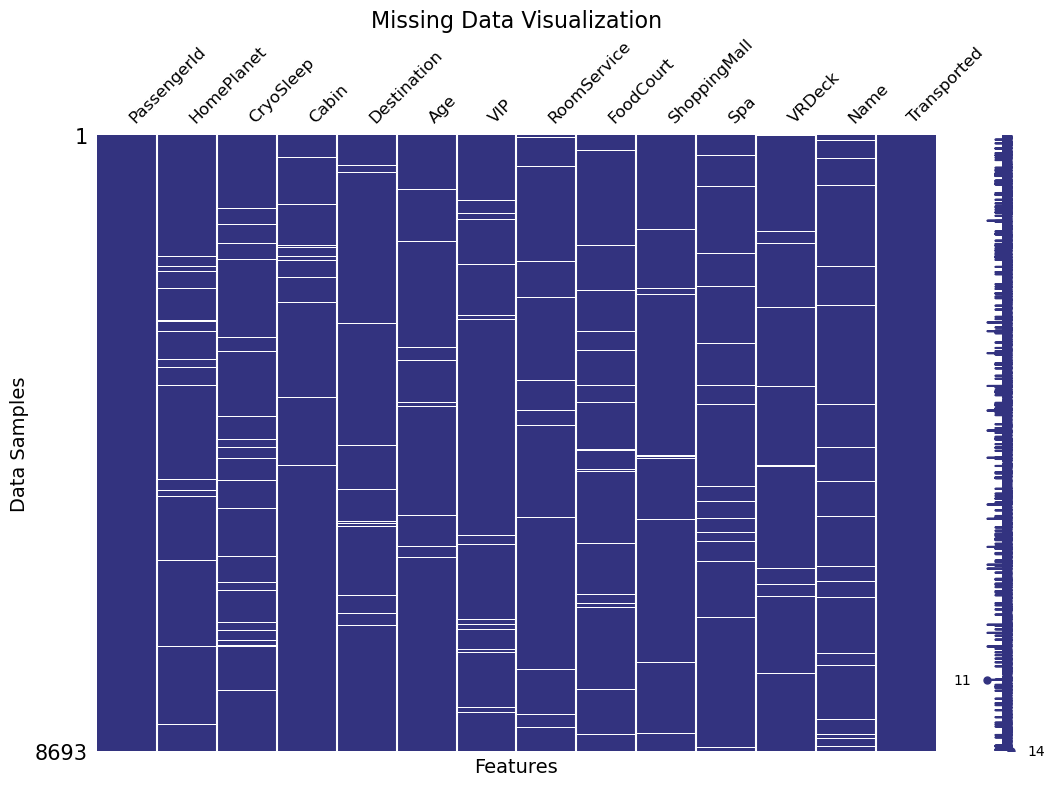

In [6]:
# Alternativelly, using missigno to visualize missing data
missingno.matrix(base,figsize=(12,8), fontsize=12, color=(0.20, 0.20, 0.50))

# Customize plot labels and title
plt.xlabel('Features', fontsize=14)
plt.ylabel('Data Samples', fontsize=14)
plt.title('Missing Data Visualization', fontsize=16)


plt.show()

#### 2.3. Making the Transported 0 or 1

We're changhing the boolean values True or False to an 1 and 0 to facilitate the use of models to analyse the data. We choose to do it beforehand as it appears to be common practice.

In [7]:
# Check unique values in the 'Transported' column
#print(df['Transported'].unique())
base.loc[:, 'Transported'] = base['Transported'].astype(int)
#print(df['Transported'].unique())
#df.Transported.value_counts()

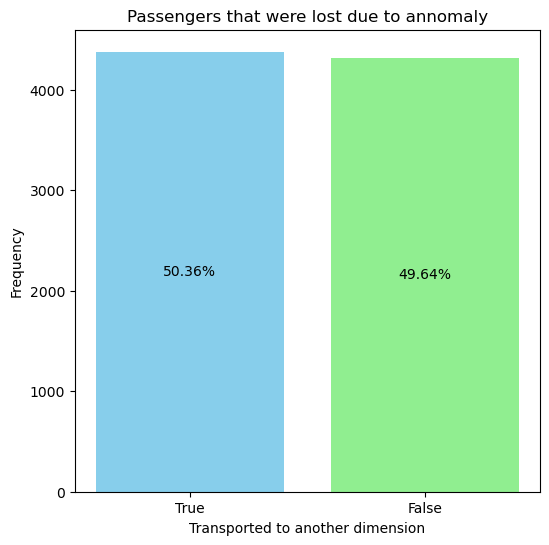

In [8]:
# Count the frequency of True and False values in the 'Transported' column
transported_counts = base['Transported'].value_counts()

# Data for the bar chart
categories = ['True', 'False']
counts = [transported_counts.get(1, 0), transported_counts.get(0, 0)]

# Calculate percentages
total = sum(counts)
percentages = [count / total * 100 for count in counts]

# Define colors for each bar
colors = ['skyblue', 'lightgreen']

# Plotting the bar chart with colored bars and percentages annotated in the middle
plt.figure(figsize=(6, 6))
bars = plt.bar(categories, counts, color=colors)

# Annotate the bars with percentages in the middle
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{percentage:.2f}%', ha='center', va='center', color='black')

plt.xlabel('Transported to another dimension')
plt.ylabel('Frequency')
plt.title('Passengers that were lost due to annomaly')
plt.show()

The dataset seem to be well balanced, with about half of the passengers being transported to anothe dimension. This facilitates working with training models as the data can be used as is.

#### 2.4. Passenger's HomePlanet

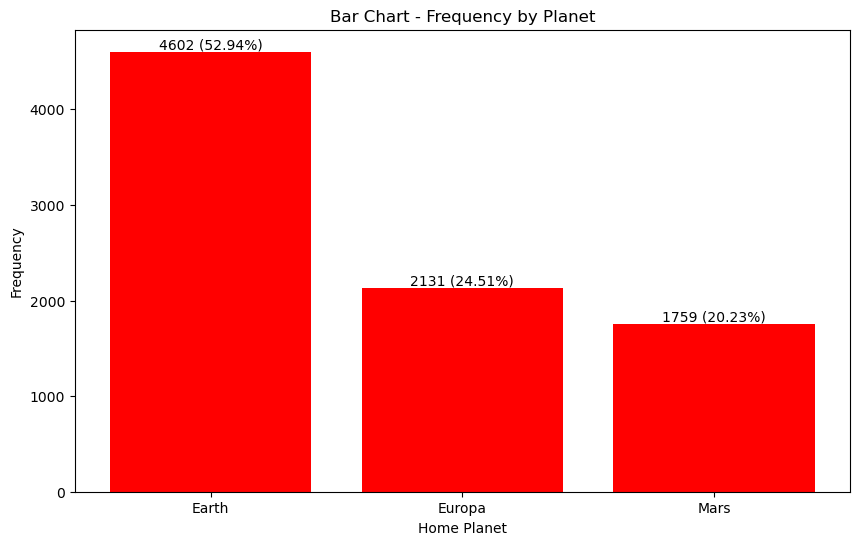

In [9]:
# Calculate the frequency of each value in the "HomePlanet" column
frequencies = base['HomePlanet'].value_counts()

# Calculate the total number of values in the "HomePlanet" column
total_values = len(base['HomePlanet'])

# Calculate the percentage of each value
percentages = (frequencies / total_values) * 100

# Sort the values of "HomePlanet" in ascending order
sorted_values = frequencies.sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_values.index, sorted_values.values, color='red')

# Add frequency and percentage values as text labels on the bars
for bar, frequency, percentage in zip(bars, sorted_values.values, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{frequency} ({percentage:.2f}%)", ha='center', va='bottom')

# Configure labels and title of the chart
plt.xlabel('Home Planet')
plt.ylabel('Frequency')
plt.title('Bar Chart - Frequency by Planet')

# Display the chart
plt.show()


Over half of the pasengers came from Earth in our dataset, approximately 53%. Mars is the least common origin with a little over 20% of passengers. Europa fits in the middle with 24.5%.  The remaining is missing data.

#### 2.5. Destination of Passengers

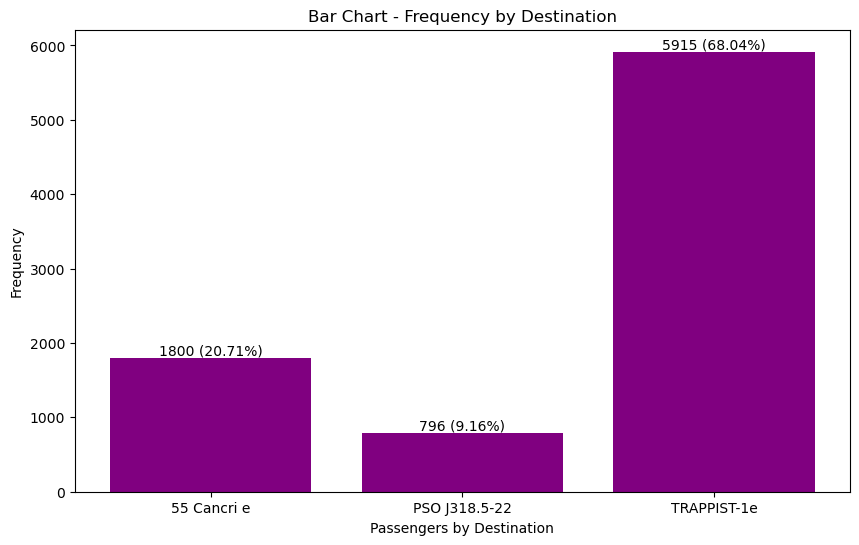

In [10]:
# Calculate the frequency of each value in the "Destination" column
frequencies = base['Destination'].value_counts()

# Calculate the total number of values in the "Destination" column
total_values = len(base['Destination'])

# Calculate the percentage of each value
percentages = (frequencies / total_values) * 100

# Sort the values of "Destination" in ascending order
sorted_values = frequencies.sort_index()
percentages = percentages.sort_index()


# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_values.index, sorted_values.values, color='purple')

# Add frequency and percentage values as text labels on the bars
for bar, frequency, percentage in zip(bars, sorted_values.values, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{frequency} ({percentage:.2f}%)", ha='center', va='bottom')

# Configure labels and title of the chart
plt.xlabel('Passengers by Destination')
plt.ylabel('Frequency')
plt.title('Bar Chart - Frequency by Destination')

# Display the chart
plt.show()


The most common destination is TRAPPIST-1e, with 68% of the passengers that we have this data chosing this destination. The secon most common is 55 Cancri e, chosen by 20.7 % of the passengers and the least common was PSO j318.5-22, with only a little over 9%. The remaining to complete the tortal is due to missing data.

#### 2.6. Compararison of passengers on cryogenic sleep and awake state

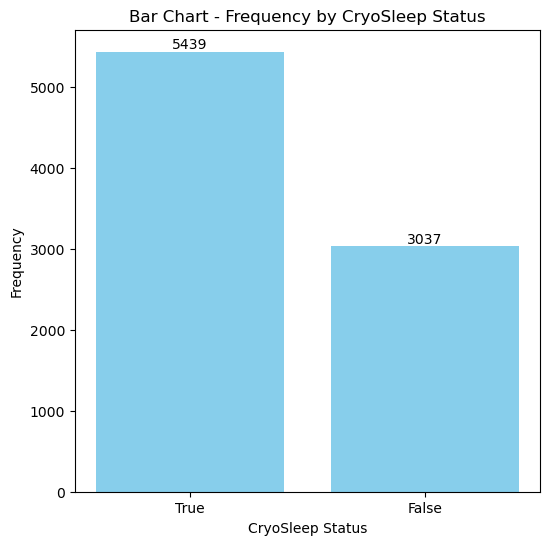

In [11]:
# Calculate the frequency of True and False values in the "CryoSleep" column
frequencies = base['CryoSleep'].value_counts()

# Create the bar chart with boolean values on the x-axis
plt.figure(figsize=(6, 6))
bars = plt.bar(['True', 'False'], frequencies.values, color='skyblue')

# Add frequency values as text labels on the bars
for bar, frequency in zip(bars, frequencies.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(frequency), ha='center', va='bottom')

# Configure the labels and title of the chart
plt.xlabel('CryoSleep Status')
plt.ylabel('Frequency')
plt.title('Bar Chart - Frequency by CryoSleep Status')

# Display the chart
plt.show()


The prefered method of traveling in the spaceship is by cryogenic sleep, used by 5439 passengers in our list, not accounting for missing data. This is roughly about 62.5% of the passenger list. Others, 3037 passengers (close to 35%) prefered to stay awake during the travel time, enjoying the facilities available in the spaceship to spend their time. Missing data is affects 2.5% of the data in this category. 

#### 2.7. Passenger's age distribution

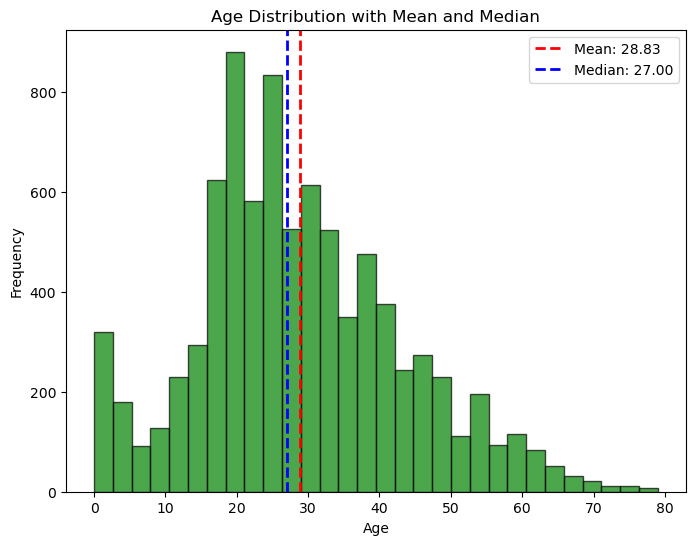

In [12]:
# Create a histogram for age data
plt.figure(figsize=(8, 6))
plt.hist(base['Age'], bins=30, color='green', edgecolor='black', alpha=0.7)

# Highlight mean and median on the plot
mean_age = base['Age'].mean()
median_age = base['Age'].median()

plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_age:.2f}')

# Annotate mean and median values on the plot
#plt.text(mean_age, 50, f'{mean_age:.2f}', color='red', ha='center')
#plt.text(median_age, 45, f'{median_age:.2f}', color='green', ha='center')

# Configure labels and title of the chart
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution with Mean and Median')

# Show legend
plt.legend()

# Display the plot
plt.show()



The average age passenger is 28.8 years old and the median age is 27 years. A large number of passengers have age marked as 0 and 1, that could signal that it might be missing data. As noted before, the oldest passenger aboard is 79 years old.

In [13]:
# Count passengers with age=1 and age=0
passengers_age_1 = base[base['Age'] == 1]['Age'].count()
passengers_age_0 = base[base['Age'] == 0]['Age'].count()

# Count passengers with missing (NaN) age values
passengers_missing_age = base['Age'].isnull().sum()

print(f'Number of passengers with age=1: {passengers_age_1}')
print(f'Number of passengers with age=0: {passengers_age_0}')
print(f'Number of passengers with missing age values: {passengers_missing_age}')


Number of passengers with age=1: 67
Number of passengers with age=0: 178
Number of passengers with missing age values: 179


The missing data in this category are slightly lower than in other categories, amounting to only 2%. However, there is a significant number of passengers whose age is recorded as 0 or 1. This might contribute to part of the missing data since Age is the category with the least number of NaN values. In this scenario, we need to calculate two averages for filling missing data: one for adults and another for children, excluding these dubious values. We believe this approach is justified because the number of ages marked as zero or one is quite large. Removing these values can potentially result in lower bias compared to retaining them as they are.

In [14]:
# Drop rows with age less than 1 or NaN
cleaned_base = base[(base['Age'] > 1) & (~base['Age'].isnull())]

# Calculate mean age for adults (18 years and above)
mean_adult_age = cleaned_base[cleaned_base['Age'] >= 18]['Age'].mean()

# Calculate mean age for underage passengers
mean_underage_age = cleaned_base[cleaned_base['Age'] < 18]['Age'].mean()
print('Excluding NaN and passengers whose age is 0 or 1, we calculated the following:')
print(f'Mean adult age: {round(mean_adult_age,0)}(rounded); mean children age: {round(mean_underage_age,0)} (rounded)')



Excluding NaN and passengers whose age is 0 or 1, we calculated the following:
Mean adult age: 33.0(rounded); mean children age: 11.0 (rounded)


#### 2.8. Pasenger's on VIP Class and broken commoners

In [15]:
# Count how many VIP values are True
count_burgeoise = base['VIP'].sum()

print(f"Number of VIP passengers: {count_burgeoise} ~ {count_burgeoise/total_rows*100:.2f}%")



Number of VIP passengers: 199 ~ 2.29%


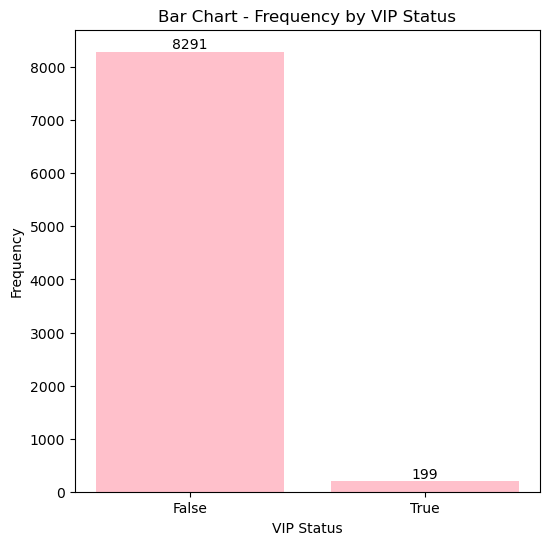

In [16]:
# Calculate the frequency of True and False values in the "VIP" column
frequencies = base['VIP'].value_counts()

# Create the bar chart with boolean values on the x-axis
plt.figure(figsize=(6, 6))
bars = plt.bar(['False', 'True'], frequencies.values, color='pink')

# Add frequency values as text labels on the bars
for bar, frequency in zip(bars, frequencies.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(frequency), ha='center', va='bottom')

# Configure the labels and title of the chart
plt.xlabel('VIP Status')
plt.ylabel('Frequency')
plt.title('Bar Chart - Frequency by VIP Status')

# Display the chart
plt.show()


Out of the 8693 passengers, only 199 acquired the VIP service, accounting for a mere 2.3% of the passengers. In this category, we identified 203 cells with missing data.

#### 2.9. Understanding expenses

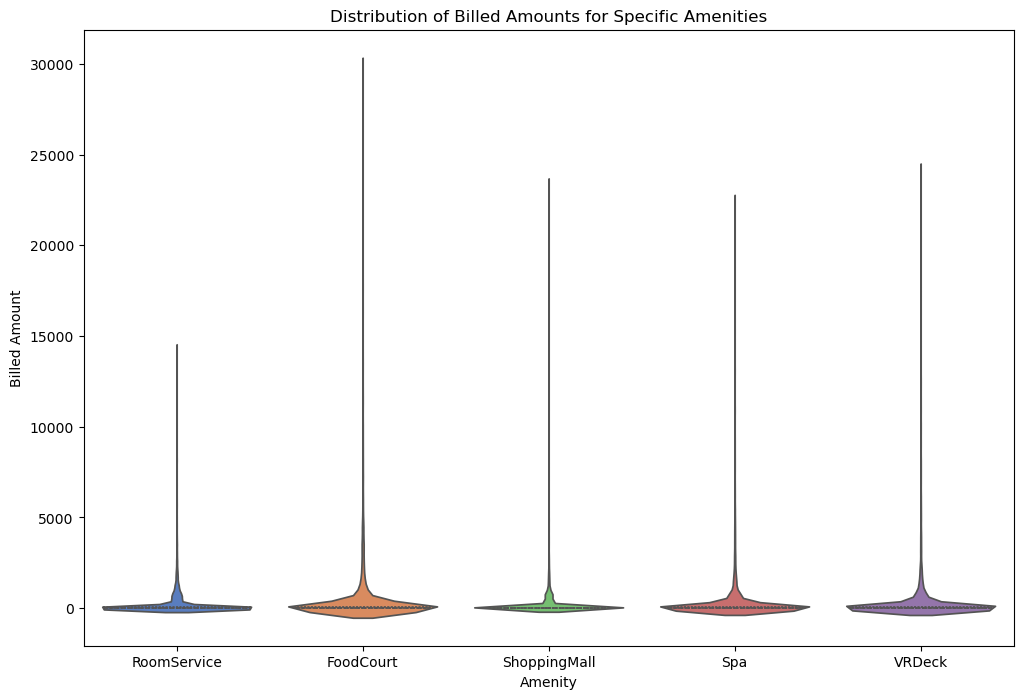

In [17]:
# Specify the indices of the columns you want to include in the plot
column_indices = [7, 8, 9, 10, 11]

# Create a subset of the DataFrame with the specified columns
subset_df = base.iloc[:, column_indices]

# Melt the DataFrame to long format for visualization
melted_df = subset_df.melt(var_name='Amenity', value_name='Billed Amount')

# Violin plot for the specified columns
plt.figure(figsize=(12, 8))
#sns.violinplot(x='Amenity', y='Billed Amount', data=melted_df, inner='quart', palette='muted')
sns.violinplot(x='Amenity', y='Billed Amount', data=melted_df, inner='quart', hue='Amenity', palette='muted', legend=False)
# Configure labels and title of the chart
plt.xlabel('Amenity')
plt.ylabel('Billed Amount')
plt.title('Distribution of Billed Amounts for Specific Amenities')

plt.show()


From this we can infer that most passengers have very low expenditure aboard the spaceship, but a few are big spenders.

In [18]:
# Creates a new dataframe to compare passengers expenses

# drop NaN values
df_cleaned =base.dropna(subset=['CryoSleep'])

# Convert to 1 and 0, instead of True and False boolean
df_cleaned.loc[:, 'CryoSleep'] = df_cleaned['CryoSleep'].astype(int)

# Filter passengers in cryogenic sleep (where CryoSleep column is 1)
cryosleep_passengers = df_cleaned[df_cleaned['CryoSleep'] == 1]

# Filter passengers not in cryogenic sleep (where CryoSleep column is 0)
non_cryosleep_passengers = df_cleaned[df_cleaned['CryoSleep'] == 0]


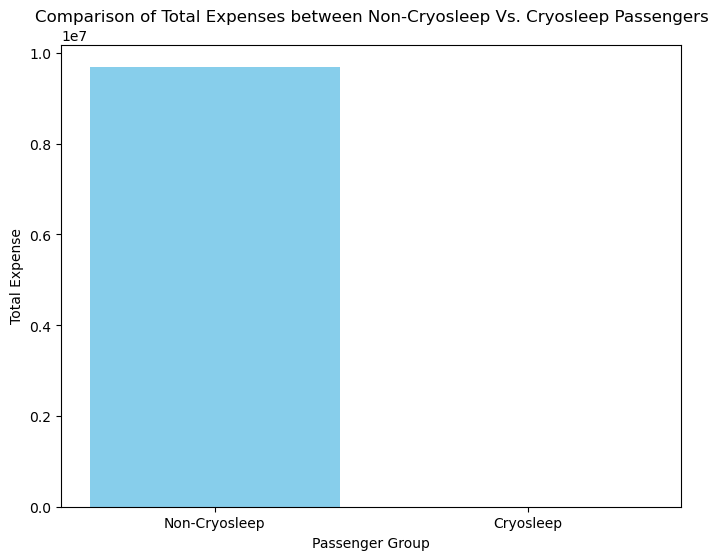

In [19]:
import matplotlib.pyplot as plt

# Calculate total expenses for non-cryosleep passengers
non_cryosleep_total_expense = non_cryosleep_passengers[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']].sum(axis=1)

# Calculate total expenses for cryosleep passengers
cryosleep_total_expense = cryosleep_passengers[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']].sum(axis=1)

# Create a bar chart to compare total expenses between non-cryosleep and cryosleep passengers
plt.figure(figsize=(8, 6))
plt.bar(['Non-Cryosleep', 'Cryosleep'], [non_cryosleep_total_expense.sum(), cryosleep_total_expense.sum()], color=['skyblue', 'orange'])
plt.xlabel('Passenger Group')
plt.ylabel('Total Expense')
plt.title('Comparison of Total Expenses between Non-Cryosleep Vs. Cryosleep Passengers')
plt.show()



No cryosleep passengers had expenses in any of the amenities, so we're about to plot the next one in log scale and exclude passengers that are sleeping in cryogenic state.

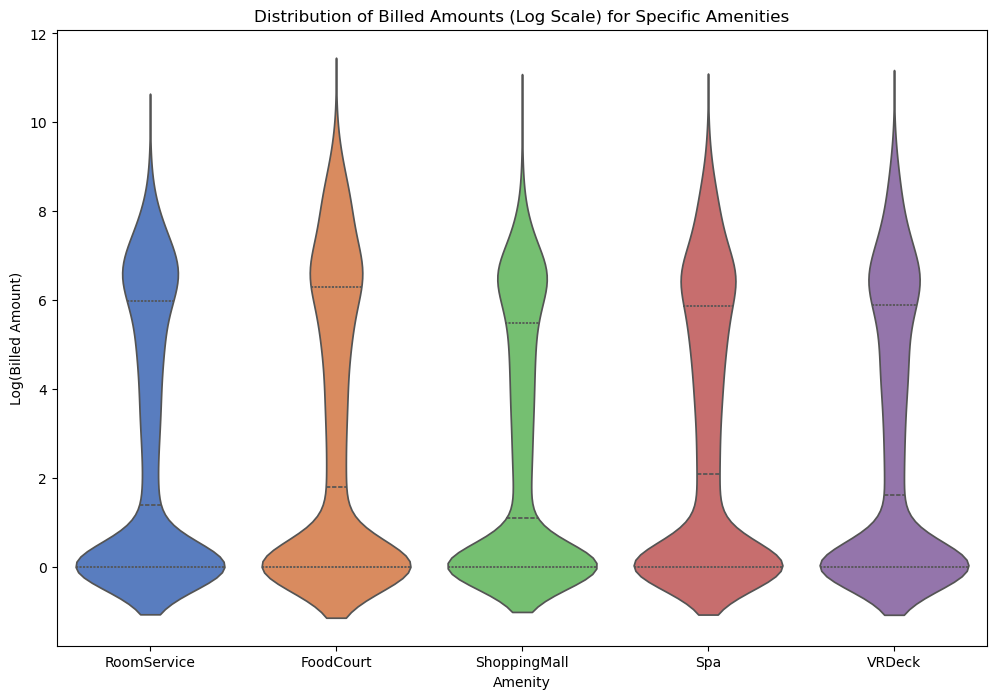

In [20]:
# Assuming 'VIP' column is named 'VIP' (adjust the column name if it's different in your DataFrame)
vip_filter = base[base['CryoSleep'] == 0]

# Specify the column names you want to include in the plot
column_names = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']  # Replace with your actual column names

# Create a subset of the DataFrame with the specified columns
subset_df = vip_filter[column_names]

# Melt the DataFrame to long format for visualization
melted_df = subset_df.melt(var_name='Amenity', value_name='Billed Amount')

# Apply log transformation to 'Billed Amount'
melted_df['Billed Amount'] = np.log1p(melted_df['Billed Amount'])

# Violin plot for the specified columns with log transformation on y-axis
plt.figure(figsize=(12, 8))
sns.violinplot(x='Amenity', y='Billed Amount', data=melted_df, inner='quart', hue='Amenity', palette='muted', legend=False)
# Configure labels and title of the chart
plt.xlabel('Amenity')
plt.ylabel('Log(Billed Amount)')  # Adding 1 before log transformation to handle zeros
plt.title('Distribution of Billed Amounts (Log Scale) for Specific Amenities')

plt.show()


The plot reinforces that most passengers didn't expend much, but a few have very high expenses.

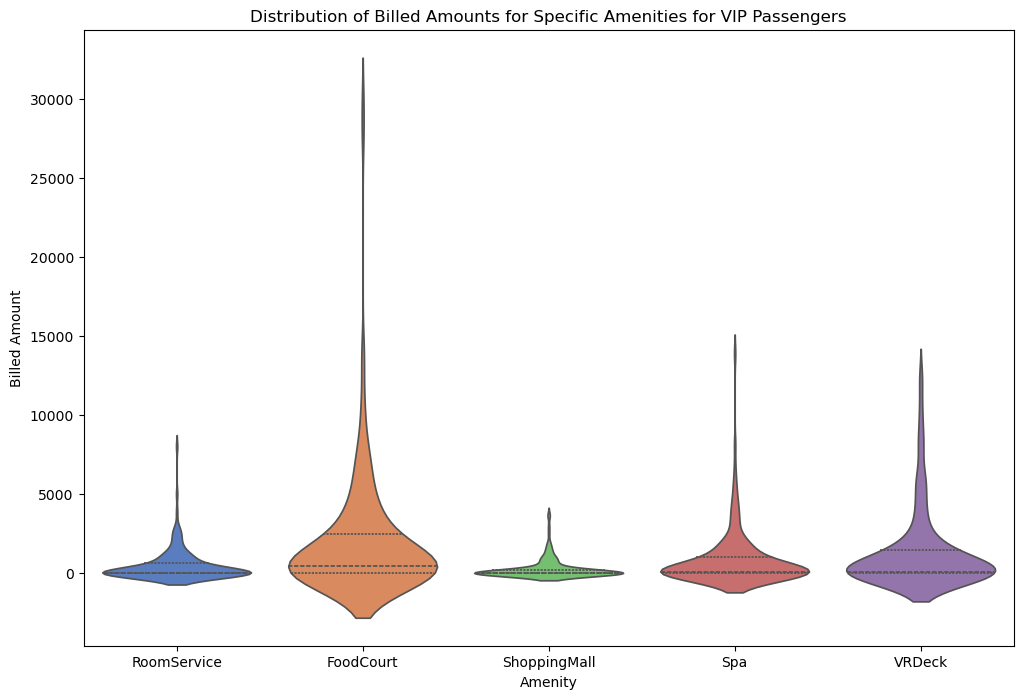

In [21]:
# Assuming 'VIP' column is named 'VIP' (adjust the column name if it's different in your DataFrame)
vip_filter = base[(base['CryoSleep'] == 0) & (base['VIP'] == 1)]


# Specify the column names you want to include in the plot
column_names = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']  # Replace with your actual column names

# Create a subset of the filtered DataFrame with the specified columns
subset_df = vip_filter[column_names]

# Melt the DataFrame to long format for visualization
melted_df = subset_df.melt(var_name='Amenity', value_name='Billed Amount')

# Violin plot for the specified columns
plt.figure(figsize=(12, 8))
sns.violinplot(x='Amenity', y='Billed Amount', data=melted_df, inner='quart', hue='Amenity', palette='muted', legend=False)

# Configure labels and title of the chart
plt.xlabel('Amenity')
plt.ylabel('Billed Amount')
plt.title('Distribution of Billed Amounts for Specific Amenities for VIP Passengers')

plt.show()

As expected, VIP passengers in general have more distributed expenses in amenities than the general population.

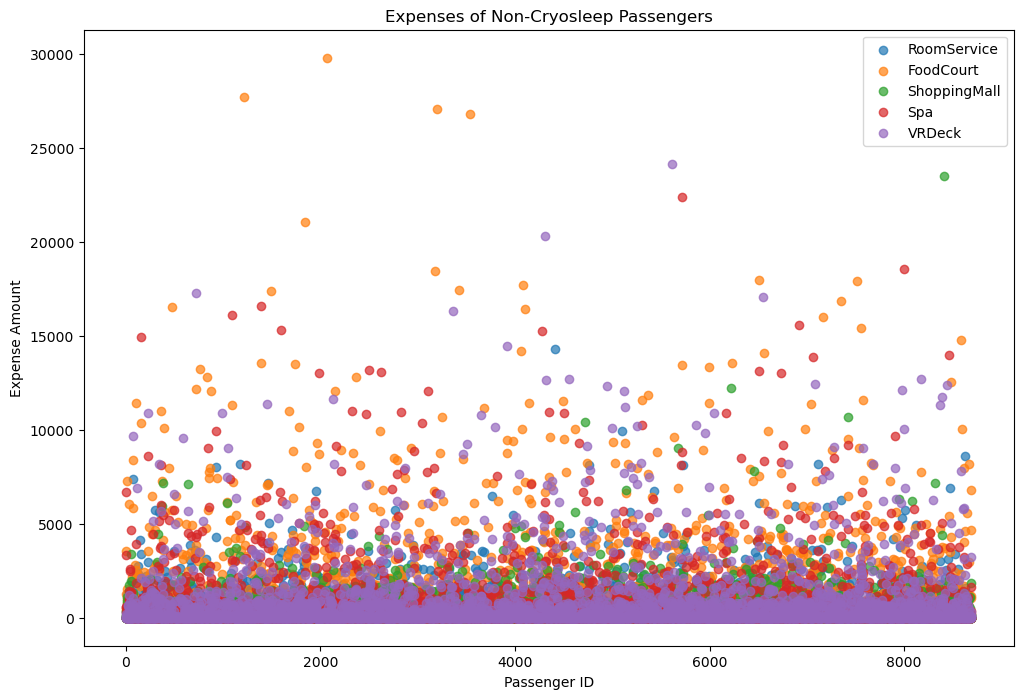

In [22]:
# Categories of expenses
expense_categories = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
AMENITIES = expense_categories
# Create scatter plots for each expense category for non_cryosleep passengers
plt.figure(figsize=(12, 8))
for category in expense_categories:
    plt.scatter(non_cryosleep_passengers.index, non_cryosleep_passengers[category], label=category, alpha=0.7)

plt.xlabel('Passenger ID')
plt.ylabel('Expense Amount')
plt.title('Expenses of Non-Cryosleep Passengers')
plt.legend()
plt.show()

This was a mostly useless plot, let's try ploting expenses against age

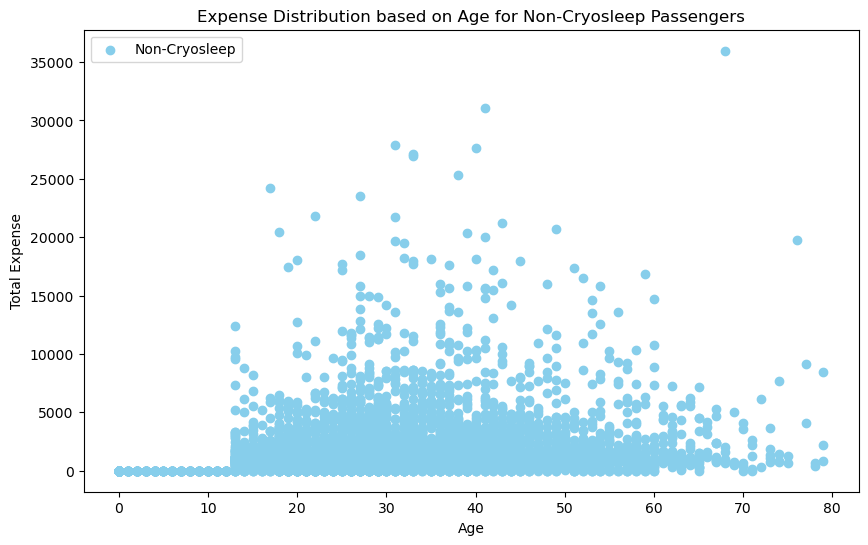

In [23]:
# Calculate total expenses for non-cryosleep passengers based on age
pd.options.mode.chained_assignment = None
non_cryosleep_passengers.loc[:, 'TotalExpense'] = non_cryosleep_passengers[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']].sum(axis=1)

# Create a scatter plot to show the expense distribution based on age for non-cryosleep passengers only
plt.figure(figsize=(10, 6))
plt.scatter(non_cryosleep_passengers['Age'], non_cryosleep_passengers['TotalExpense'], color='skyblue', label='Non-Cryosleep')

plt.xlabel('Age')
plt.ylabel('Total Expense')
plt.title('Expense Distribution based on Age for Non-Cryosleep Passengers')
plt.legend()
plt.show()



Passengers under 13 years old didn't have any expense. That makes sense as it might be under their parents key card.

#### 2.10. Families onboard

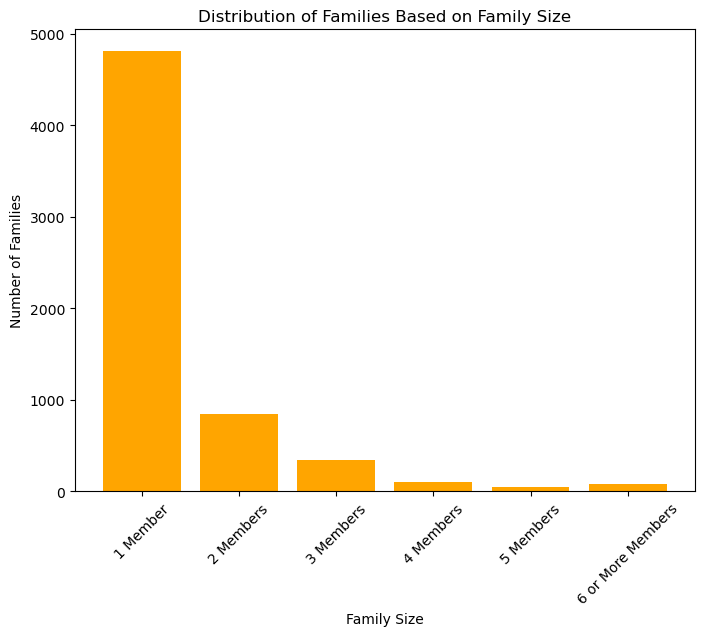

In [24]:
# Extract family and individual numbers
base['FamilyNumber'] = base['PassengerId'].apply(lambda x: x.split('_')[0])
base['IndividualNumber'] = base['PassengerId'].apply(lambda x: x.split('_')[1])

# Count occurrences for each family number (XXXX)
family_counts = base['FamilyNumber'].value_counts()

# Count occurrences for each family number (XXXX)
family_counts = base['FamilyNumber'].value_counts()

# Count occurrences for each individual number (YY) within the same family
individual_counts = base.groupby('FamilyNumber')['IndividualNumber'].nunique()

# Count families with 1, 2, 3, 4, 5, or 6 or more members
families_1_member = len(individual_counts[individual_counts == 1])
families_2_members = len(individual_counts[individual_counts == 2])
families_3_members = len(individual_counts[individual_counts == 3])
families_4_members = len(individual_counts[individual_counts == 4])
families_5_members = len(individual_counts[individual_counts == 5])
families_6_or_more_members = len(individual_counts[individual_counts >= 6])

# Data for the bar chart
categories = ['1 Member', '2 Members', '3 Members', '4 Members', '5 Members', '6 or More Members']
counts = [families_1_member, families_2_members, families_3_members, families_4_members, families_5_members, families_6_or_more_members]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color='orange')
plt.xticks(rotation=45)
plt.xlabel('Family Size')
plt.ylabel('Number of Families')
plt.title('Distribution of Families Based on Family Size')
plt.show()



Family relationships among passengers can be determined from the "PassengerId" column. The code can be divided into two parts: one part is common to the family group, and the other part identifies the individual within the family. Therefore, a unique family number indicates that the individual is traveling alone. This suggests that most individuals were traveling alone, possibly relocating for opportunities in the colonies.

#### 3.10.1. Study about the kinship based on common surname.

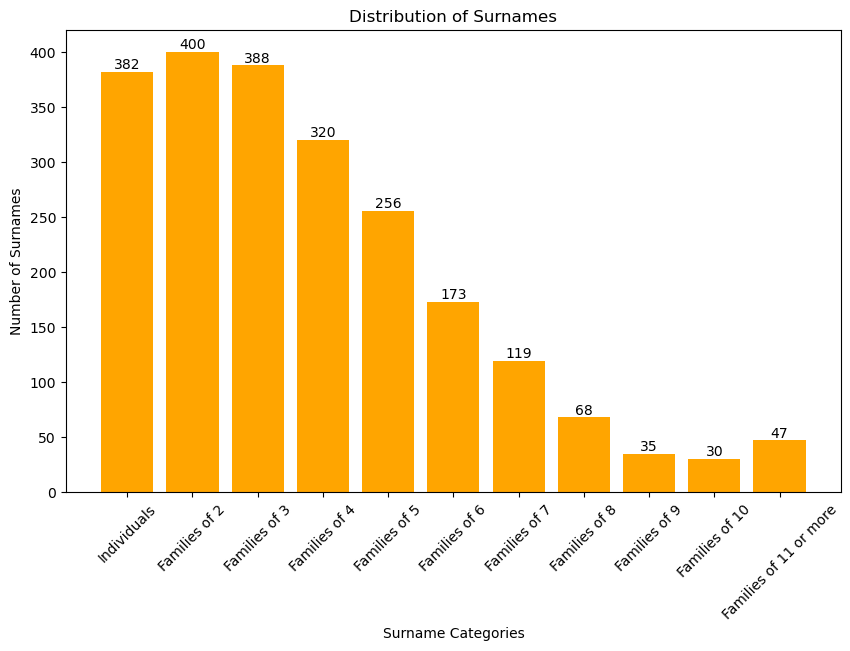

In [25]:
# Convert NaN values to an empty string before splitting
df_surname = base.copy()
# Convert NaN values to an empty string before splitting
df_surname['Name'] = df_surname['Name'].fillna('')

# Extract Surnames
df_surname['Surname'] = df_surname['Name'].apply(lambda x: x.split()[-1] if x else '')

surname_counts = df_surname['Surname'].value_counts()

# Count families (surnames with multiple occurrences)
individuals = len(surname_counts[surname_counts == 1])
families_2 = len(surname_counts[surname_counts == 2])
families_3 = len(surname_counts[surname_counts == 3])
families_4 = len(surname_counts[surname_counts == 4])
families_5 = len(surname_counts[surname_counts == 5])
families_6 = len(surname_counts[surname_counts == 6])
families_7 = len(surname_counts[surname_counts == 7])
families_8 = len(surname_counts[surname_counts == 8])
families_9 = len(surname_counts[surname_counts == 9])
families_10 = len(surname_counts[surname_counts == 10])
families_11_or_more = len(surname_counts[surname_counts >= 11])

# Data for the bar chart
categories = ['Individuals', 'Families of 2', 'Families of 3', 'Families of 4', 'Families of 5',
              'Families of 6', 'Families of 7', 'Families of 8', 'Families of 9', 'Families of 10', 'Families of 11 or more']
counts = [individuals, families_2, families_3, families_4, families_5, families_6, families_7, families_8, families_9,
          families_10, families_11_or_more]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color='orange')
plt.xlabel('Surname Categories')
plt.ylabel('Number of Surnames')
plt.title('Distribution of Surnames')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Adding frequency values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

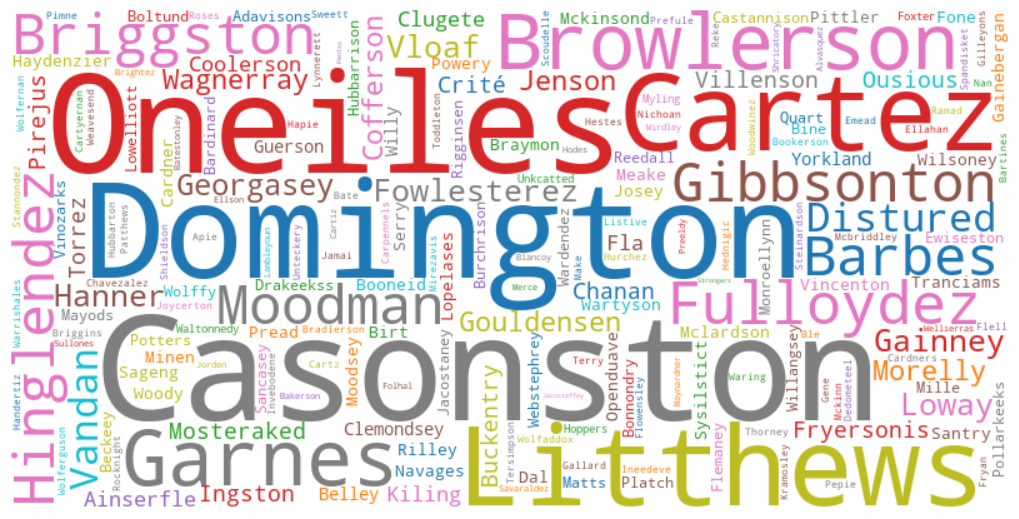

In [26]:


# Assuming surname_counts contains the surname frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10').generate_from_frequencies(surname_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()



Wordcloud of surnames in the dataset. The font size is proportional to the frequency found in the data.

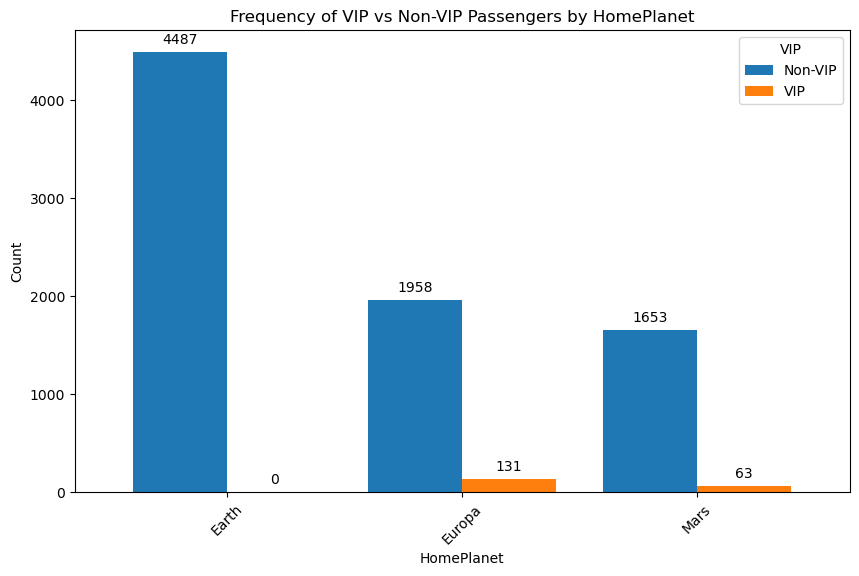

In [27]:
# Group the data by HomePlanet and VIP, then count the occurrences
planet_vip_counts = base.groupby(['HomePlanet', 'VIP']).size().unstack(fill_value=0)

# Plot the data with separate bars for VIP and Non-VIP
ax = planet_vip_counts.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.title('Frequency of VIP vs Non-VIP Passengers by HomePlanet')
plt.legend(title='VIP', labels=['Non-VIP', 'VIP'])
plt.xticks(rotation=45)

# Annotate the bars with frequency numbers
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()


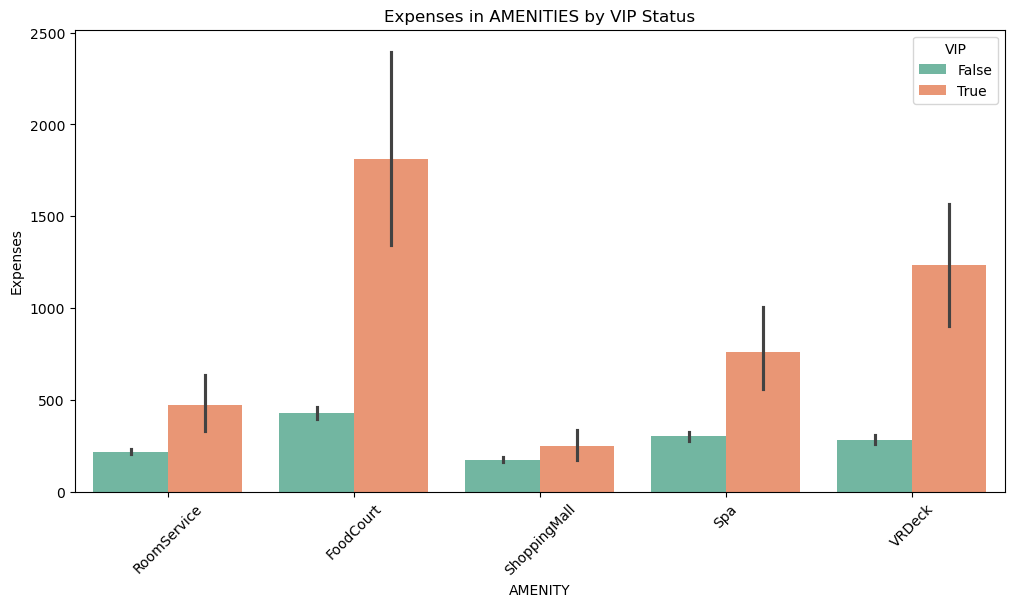

In [28]:
# Reshape the DataFrame using melt to create a long-format DataFrame
melted_df = base.melt(id_vars='VIP', value_vars=AMENITIES, var_name='AMENITY', value_name='Expenses')

# Create a barplot to visualize expenses in AMENITIES based on VIP status
plt.figure(figsize=(12, 6))
sns.barplot(x='AMENITY', y='Expenses', hue='VIP', data=melted_df, palette='Set2')
plt.xlabel('AMENITY')
plt.ylabel('Expenses')
plt.title('Expenses in AMENITIES by VIP Status')
plt.xticks(rotation=45)
plt.legend(title='VIP', loc='upper right')
plt.show()



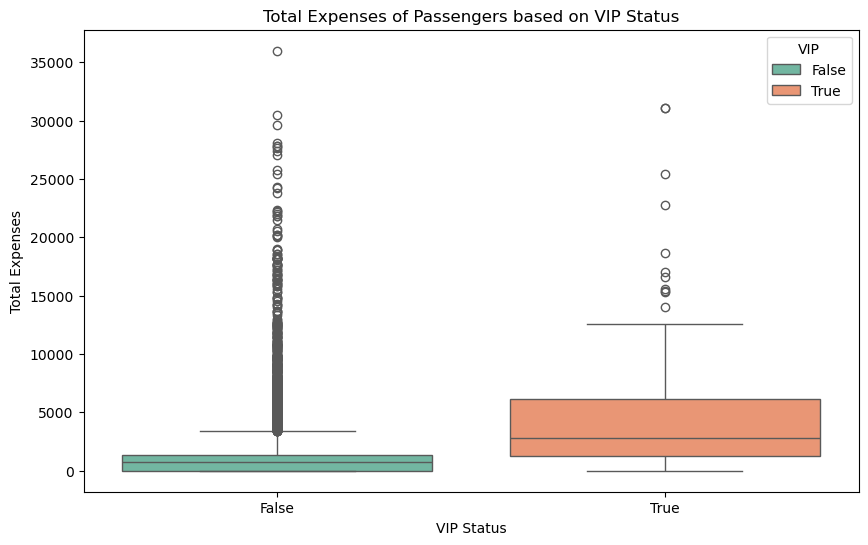

In [29]:
# Calculate total expenses for each passenger
df_surname['TotalExpenses'] = df_surname[AMENITIES].sum(axis=1)

# Create a boxplot for total expenses based on VIP status
plt.figure(figsize=(10, 6))
sns.boxplot(x='VIP', y='TotalExpenses', hue='VIP', data=df_surname, palette='Set2')
#sns.boxplot(x='VIP', y='TotalExpenses', hue='VIP', data=df_surname, palette='Set2', legend=False)
plt.xlabel('VIP Status')
plt.ylabel('Total Expenses')
plt.title('Total Expenses of Passengers based on VIP Status')
plt.show()



## 3. Separating the training data from the test

 70% Training data left on main dataset for training. 30% is going to be used for the crossvalidation stage.

In [30]:
from sklearn.model_selection import train_test_split
X = base.drop(columns=['Transported'])
y = base.Transported
df, X_val, y_df, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
df.shape, y_df.shape

((6085, 15), (6085,))

In [32]:
X_val.shape, y_val.shape

((2608, 15), (2608,))

In [33]:
# Export the DataFrame to a CSV file
X_val.to_csv('test_validation30.csv', index=False)

# This will create a CSV file named 'test_validation30.csv' to work on other notebook.

In [34]:
#remove this cell!!!! Just for testing the code
#df=base

## 4. Filling missing values in the training data
### 4.1 Expenses
As passengers under 13 years old have no expenses, those with missing values will receive a zero value. Also passengers under cryogenic sleep didn't have any expenses, they are going to be treated similarly. VIP status is set to 0 for these passengers as they cannot use money.

In [35]:
# List of services to check for missing values
SERVICES = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "VIP"]

# Count missing values for passengers under CryoSleep in the specified columns
missing_values_count = df.loc[df.CryoSleep == 1, SERVICES].isna().sum()

# Print the count of missing values for each service
print("Number of missing values for passengers under CryoSleep:")
print(missing_values_count)

# List of services to check for missing values
SERVICES = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "VIP"]

# Count missing values for passengers under 13 years old in the specified columns
missing_values_count = df.loc[df.Age < 13, SERVICES].isna().sum()

# Print the count of missing values for each service
print("Number of missing values for passengers under 13 years old:")
print(missing_values_count)

Number of missing values for passengers under CryoSleep:
RoomService     41
FoodCourt       48
ShoppingMall    70
Spa             38
VRDeck          46
VIP             51
dtype: int64
Number of missing values for passengers under 13 years old:
RoomService     14
FoodCourt        8
ShoppingMall    14
Spa             10
VRDeck          12
VIP             19
dtype: int64


In [36]:
# Replaces missing values with 0 for passengers under 13 years old
SERVICES = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
values = dict(zip(SERVICES, [0.0]*5))
values['VIP'] = False
df.loc[df.Age < 13] = df.loc[df.Age < 13].fillna(value=values)

In [37]:
# Replaces missing values with 0 for passengers under CryoSleep
SERVICES = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
values = dict(zip(SERVICES, [0.0]*5))
values['VIP'] = False
df.loc[df.CryoSleep == 1] = df.loc[df.CryoSleep == 1].fillna(value=values)

In [38]:
# List of services to check for missing values
SERVICES = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "VIP"]

# Count missing values for passengers under CryoSleep in the specified columns
missing_values_count = df.loc[df.CryoSleep == 1, SERVICES].isna().sum()

# Print the count of missing values for each service
print("Number of missing values for passengers under CryoSleep:")
print(missing_values_count)

# List of services to check for missing values
SERVICES = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "VIP"]

# Count missing values for passengers under 13 years old in the specified columns
missing_values_count = df.loc[df.Age < 13, SERVICES].isna().sum()

# Print the count of missing values for each service
print("Number of missing values for passengers under 13 years old:")
print(missing_values_count)

Number of missing values for passengers under CryoSleep:
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
VIP             0
dtype: int64
Number of missing values for passengers under 13 years old:
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
VIP             0
dtype: int64


Amenities expenses for passengers in cryogenic sleep and under 13 years old are set to zero. 

#### 4.2. Using passengers that are related, we're trying to add Destination, CryoSleep, Cabin and HomePlanet


In [39]:
# Low hanging Destination missing data filling
missing_values_count = df['Destination'].isna().sum()
print(f'Missing Destination original: {missing_values_count} ')

# Iterate through the DataFrame
for index, row in df.iterrows():
    passenger_id = row['PassengerId']
    destination = row['Destination']

    # Check if the destination is missing (NaN) and PassengerId is not empty
    if pd.isna(destination) and len(str(passenger_id)) > 0:
        # Extract family number from PassengerId
        family_number = passenger_id.split('_')[0][:4]

        # Find related PassengerId with a valid destination
        related_passenger_id = df.loc[(df['PassengerId'].str.contains(family_number)) &
                                               (~df['Destination'].isna()), 'PassengerId'].values

        # If there is a related PassengerId, fill the missing destination
        if len(related_passenger_id) > 0:
            related_destination = df.loc[df['PassengerId'] == related_passenger_id[0], 'Destination'].values[0]
            df.at[index, 'Destination'] = related_destination

# Now df should have missing destinations filled dfd on related PassengerIds

# Compare after filling  missing CryoSleep values filled dfd on majority of related individuals
missing_values_count = df['Destination'].isna().sum()
print(f'Missing Destination now: {missing_values_count} ')


Missing Destination original: 122 
Missing Destination now: 78 


In [40]:
# Low hanging CryoSleep missing data filling
missing_values_count = df['CryoSleep'].isna().sum()
print(f'Missing Cryosleep original: {missing_values_count} ')

# Iterate through the DataFrame
for index, row in df.iterrows():
    passenger_id = row['PassengerId']
    cryo_sleep = row['CryoSleep']

    # Check if CryoSleep is missing (NaN) and PassengerId is not empty
    if pd.isna(cryo_sleep) and len(str(passenger_id)) > 0:
        # Extract family number from PassengerId
        family_number = passenger_id.split('_')[0][:4]

        # Find related CryoSleep values for individuals with the same family number
        related_cryo_sleep_values = df.loc[df['PassengerId'].str.contains(family_number), 'CryoSleep'].dropna()

        # If there are related CryoSleep values, fill the missing CryoSleep dfd on majority
        if not related_cryo_sleep_values.empty:
            # Count True and False values
            true_count = related_cryo_sleep_values.sum()
            false_count = len(related_cryo_sleep_values) - true_count

            # Fill missing CryoSleep dfd on majority
            if true_count > false_count:
                df.at[index, 'CryoSleep'] = True
            elif false_count > true_count:
                df.at[index, 'CryoSleep'] = False

# Now df should have missing CryoSleep values filled dfd on majority of related individuals

# Compare after filling  missing CryoSleep values filled dfd on majority of related individuals
missing_values_count = df['CryoSleep'].isna().sum()
print(f'Missing CryoSleep now: {missing_values_count} ')

Missing Cryosleep original: 154 
Missing CryoSleep now: 93 


In [41]:
# Low hanging Cabin missing data filling
missing_values_count = df['Cabin'].isna().sum()
print(f'Missing Cabin original: {missing_values_count} ')

# Iterate through the DataFrame
for index, row in df.iterrows():
    passenger_id = row['PassengerId']
    cabin = row['Cabin']

    # Check if the cabin is missing (NaN) and PassengerId is not empty
    if pd.isna(cabin) and len(str(passenger_id)) > 0:
        # Extract family number from PassengerId
        family_number = passenger_id.split('_')[0][:4]

        # Find related PassengerId with a valid cabin
        related_passenger_id = df.loc[(df['PassengerId'].str.contains(family_number)) &
                                               (~df['Cabin'].isna()), 'PassengerId'].values

        # If there is a related PassengerId, fill the missing cabin
        if len(related_passenger_id) > 0:
            related_cabin = df.loc[df['PassengerId'] == related_passenger_id[0], 'Cabin'].values[0]
            df.at[index, 'Cabin'] = related_cabin

# Now df should have missing cabins filled dfd on related PassengerIds

# Compare after filling  missing Cabin values filled dfd on majority of related individuals
missing_values_count = df['Cabin'].isna().sum()
print(f'Missing Cabin now: {missing_values_count} ')

Missing Cabin original: 142 
Missing Cabin now: 86 


In [42]:
# Low hanging HomePlanet missing data filling
missing_values_count = df['HomePlanet'].isna().sum()
print(f'Missing HomePlanet original: {missing_values_count} ')

# Iterate through the DataFrame
for index, row in df.iterrows():
    passenger_id = row['PassengerId']
    home_planet = row['HomePlanet']

    # Check if HomePlanet is missing (NaN) and PassengerId is not empty
    if pd.isna(home_planet) and len(str(passenger_id)) > 0:
        # Extract family number from PassengerId
        family_number = passenger_id.split('_')[0][:4]

        # Find related HomePlanet values for individuals with the same family number
        related_home_planet_values = df.loc[df['PassengerId'].str.contains(family_number), 'HomePlanet'].dropna()

        # If there are related HomePlanet values, fill the missing HomePlanet dfd on majority
        if not related_home_planet_values.empty:
            # Count unique values and their counts
            value_counts = related_home_planet_values.value_counts()

            # Get the most common value
            most_common_value = value_counts.index[0]

            # Fill missing HomePlanet with the most common value
            df.at[index, 'HomePlanet'] = most_common_value

# Now df should have missing HomePlanet values filled dfd on majority of related individuals

# Compare after filling  missing HomePlanet values filled dfd on majority of related individuals
missing_values_count = df['HomePlanet'].isna().sum()
print(f'Missing HomePlanet now: {missing_values_count} ')

Missing HomePlanet original: 140 
Missing HomePlanet now: 90 


#### 4.3. Trying to clean up Age data

In [43]:
# Count missing values in the 'Age' column
missing_age_count = df['Age'].isna().sum()

# Print the count of missing values in the 'Age' column
print("Number of Missing Values in Age Column:", missing_age_count)


Number of Missing Values in Age Column: 129


In [44]:
# Iterate through the DataFrame
for index, row in df.iterrows():
    passenger_id = row['PassengerId']
    age = row['Age']

    # Check if Age is missing (NaN) and PassengerId is not empty
    if pd.isna(age) and len(str(passenger_id)) > 0:
        # Extract family number from PassengerId
        family_number = passenger_id.split('_')[0][:4]

        # Find related Age values for individuals with the same family number
        related_age_values = df.loc[df['PassengerId'].str.contains(family_number), 'Age'].dropna()

        # Check if there are individuals with less than 18 years old in the family
        if (related_age_values < 18).any():
            # Get mean age of adults (over 18) in the family
            mean_adult_age_family = related_age_values[related_age_values >= 18].mean()
            print(f"Mean adult age in the family {family_number}: {mean_adult_age_family}")
            # Find missing Age values under the same family number
            missing_age_indices = df.loc[df['PassengerId'].str.contains(family_number) & df['Age'].isna()].index

            # Fill up to two missing Age values with the mean adult age
            for i, missing_age_index in enumerate(missing_age_indices):
                if i >= 2:
                    break
                df.at[missing_age_index, 'Age'] = mean_adult_age_family 

# Now df should have missing Age values filled dfd on family mean for adults (up to two members)

# Count missing values in the 'Age' column
missing_age_count = df['Age'].isna().sum()

# Print the count of missing values in the 'Age' column
# print("Number of Missing Values in Age Column:", missing_age_count)


Mean adult age in the family 6174: 24.0
Mean adult age in the family 5714: 19.0
Mean adult age in the family 6302: 35.0
Mean adult age in the family 2752: 58.0
Mean adult age in the family 7257: nan
Mean adult age in the family 0531: nan
Mean adult age in the family 3470: nan
Mean adult age in the family 3645: 41.666666666666664
Mean adult age in the family 5345: nan
Mean adult age in the family 8202: 42.666666666666664
Mean adult age in the family 0770: nan
Mean adult age in the family 7156: 31.0
Mean adult age in the family 0313: 54.5
Mean adult age in the family 7531: nan
Mean adult age in the family 3615: nan
Mean adult age in the family 8988: 41.5
Mean adult age in the family 6363: 41.5
Mean adult age in the family 2306: 36.0
Mean adult age in the family 6896: nan
Mean adult age in the family 7936: 21.0
Mean adult age in the family 5938: nan
Mean adult age in the family 0809: 42.0


In [45]:
# Create a mask for rows with missing Age values
missing_age_mask = df['Age'].isna()

# Extract family numbers from PassengerId
df['FamilyNumber'] = df['PassengerId'].str.split('_').str[0].str[:4]

# Find groups with 3 or more members and at least one missing Age value
groups_with_missing_age = (
    df.groupby('FamilyNumber')
    .filter(lambda x: len(x) >= 3 and missing_age_mask.loc[x.index].any())
)

# Replace missing Age values in groups with 3 or more members and at least one missing Age value
for index, row in df.loc[groups_with_missing_age.index].iterrows():
    family_number = row['FamilyNumber']
    destination = row['Destination']
    if destination is not None and destination != '' and df[(df['FamilyNumber'] == family_number)
                                                                    & (df['Destination'] == destination)
                                                                    & ~missing_age_mask].shape[0] > 0:
        df.at[index, 'Age'] = int(round(mean_underage_age,0))
print("Mean Age of Individuals below 18 (Rounded to Integer):", int(round(mean_underage_age,0)))

# Count missing values in the 'Age' column
missing_age_count = df['Age'].isna().sum()

# Print the count of missing values in the 'Age' column
print("Number of Missing Values in Age Column:", missing_age_count)

Mean Age of Individuals below 18 (Rounded to Integer): 11
Number of Missing Values in Age Column: 106


In [46]:
# this code identifies families with 3 or more members and at least 
# one member having an age value equal to 0.
# It then prints the unique family numbers of these identified groups.

# Create a mask for rows with Age values equal to 0
missing_age_mask = (df['Age'] == 0)

# Extract family numbers from PassengerId
df['FamilyNumber'] = df['PassengerId'].str.split('_').str[0].str[:4]

# Filter groups with 3 or more members and at least one Age value equal to 0
groups_with_missing_age = (
    df.groupby('FamilyNumber')
    .filter(lambda x: len(x) >= 3 and missing_age_mask.loc[x.index].any())
)

# Print the groups with 3 or more members and at least one Age value equal to 0
print(groups_with_missing_age['FamilyNumber'].unique())


['6020' '3966' '8157' '6334' '1800' '3301' '1186' '1434' '9227' '3100'
 '4181' '8318' '4695' '4482' '1918' '6402' '5967' '5969' '3211' '6662'
 '5714' '2595' '2919' '5090' '6787' '8796' '2892' '1325' '6030' '4400'
 '2602' '1353' '4061' '5535' '3499' '1149' '9074' '2944' '6328' '4128'
 '1624' '0714' '8186' '2549' '0313' '2347' '2818' '6816' '2558' '8202'
 '3868' '6139' '8964' '7650' '5416' '8770' '0220' '3476' '2560' '1615'
 '0809' '6405' '0938' '3032' '1024' '4000' '6446']


In [47]:
# this code identifies families with 3 or more members and at least 
# one member having an age value equal to 1.
# It then prints the unique family numbers of these identified groups.

# Create a mask for rows with Age values equal to 1
missing_age_mask = (df['Age'] == 1)

# Extract family numbers from PassengerId
df['FamilyNumber'] = df['PassengerId'].str.split('_').str[0].str[:4]

# Filter groups with 3 or more members and at least one Age value equal to 1
groups_with_missing_age = (
    df.groupby('FamilyNumber')
    .filter(lambda x: len(x) >= 3 and missing_age_mask.loc[x.index].any())
)

# Print the groups with 3 or more members and at least one Age value equal to 1
print(groups_with_missing_age['FamilyNumber'].unique())


['1800' '3301' '1186' '3903' '3100' '6363' '2306' '9081' '1865' '4061'
 '8226' '3499' '4592' '7872' '0714' '6309' '8886' '6092' '0020' '1311'
 '0220' '1287' '6443' '3218' '7899' '6446' '8366' '5527']


In [48]:
# Count passengers with age equal to 0
passengers_with_age_zero = df[df['Age'] == 0]
count_passengers_with_age_zero = len(passengers_with_age_zero)

# Print the count of passengers with age equal to 0
print(f"Number of passengers with age equal to 0 before: {count_passengers_with_age_zero}")

# Find individuals with Age=0 that do not have any other individual within the same FamilyNumber
age_zero_no_family_match = df[(df['Age'] == 0) &
                                       ~df.duplicated(subset='FamilyNumber', keep=False)]

# Replace Age=0 with NaN for individuals with no other family member with the same Age
df.loc[age_zero_no_family_match.index, 'Age'] = df.loc[age_zero_no_family_match.index, 'Age'].replace(0, float('nan'))

# Verify the changes
print("Missing values (NaN) were replaced for individuals with Age=0 and no other family member with the same Age.")
passengers_with_age_zero = df[df['Age'] == 0]
count_passengers_with_age_zero = len(passengers_with_age_zero)
print(f"Number of passengers with age equal to 0: {count_passengers_with_age_zero}")



Number of passengers with age equal to 0 before: 129
Missing values (NaN) were replaced for individuals with Age=0 and no other family member with the same Age.
Number of passengers with age equal to 0: 112


In [49]:
# Count passengers with age equal to 0
passengers_with_age_one = df[df['Age'] == 1]
count_passengers_with_age_one = len(passengers_with_age_one)

# Print the count of passengers with age equal to 0
print(f"Number of passengers with age equal to 1 before: {count_passengers_with_age_one}")

# Find individuals with Age=1 and do not have another individual with the same value in FamilyNumber
age_one_no_family_match = df[(df['Age'] == 1) &
                                       ~df.duplicated(subset='FamilyNumber', keep=False)]

# Replace Age=1 with NaN for individuals with no other family member with the same Age
df.loc[age_one_no_family_match.index, 'Age'] = df.loc[age_one_no_family_match.index, 'Age'].replace(1, float('nan'))

# Verify the changes
print("Missing values (NaN) were replaced for individuals with Age=1 and no other family member with the same Age.")

# Count passengers with age equal to 1
passengers_with_age_one = df[df['Age'] == 1]
count_passengers_with_age_one = len(passengers_with_age_one)

# Print the count of passengers with age equal to 1
print(f"Number of passengers with age equal to 1: {count_passengers_with_age_one}")

Number of passengers with age equal to 1 before: 44
Missing values (NaN) were replaced for individuals with Age=1 and no other family member with the same Age.
Number of passengers with age equal to 1: 41


In the end, there wasn't much that could be done about those instances where age was recorded as 0 or 1 in the age column. We opted to fill the missing values with the average adult age. This ensures that all passengers have an age value in the df dataframe.

In [50]:
# Fill missing Age values with the mean adult age
df['Age'] = df['Age'].fillna(int(round(mean_adult_age,0)))
# Print the count of missing values in the 'Age' column after filling
print("Mean adult age:", int(round(mean_adult_age,0)))

Mean adult age: 33


In [51]:
# Count passengers with age equal to 0, 1
count_age_zero = len(df[df['Age'] == 0])
count_age_one = len(df[df['Age'] == 1])
# Count missing values in the 'Age' column after filling
count_nan_age = df['Age'].isna().sum()

# Calculate mean age, mean age of passengers 18 years and above, and mean age of passengers below 18
mean_age = df['Age'].mean()
mean_age_above_18 = df[df['Age'] >= 18]['Age'].mean()
mean_age_below_18 = df[df['Age'] < 18]['Age'].mean()

# Print the counts and mean ages
print(f"Number of passengers with age equal to 0: {count_age_zero}")
print(f"Number of passengers with age equal to 1: {count_age_one}")
print(f"Number of passengers with NaN age: {count_nan_age}")
print(f"Mean age: {mean_age:.2f}")
print(f"Mean age of passengers 18 years and above: {mean_age_above_18:.2f}")
print(f"Mean age of passengers below 18: {mean_age_below_18:.2f}")


Number of passengers with age equal to 0: 112
Number of passengers with age equal to 1: 41
Number of passengers with NaN age: 0
Mean age: 28.90
Mean age of passengers 18 years and above: 33.02
Mean age of passengers below 18: 9.71


All passengers should have an age value in the df dataframe now.

#### 4.4. Dealing with the other missing data using averages and mode
##### 4.4.1. VIP status

In [52]:
print("Number of Missing Values in VIP Column before Filling:", df['VIP'].isna().sum())


Number of Missing Values in VIP Column before Filling: 90


In [53]:
# Calculate the mode of the VIP column
vip_mode = df['VIP'].mode().iloc[0]

# Calculate the total number of passengers
total_passengers = len(df)

# Calculate the number of passengers with VIP as True
vip_passengers = df['VIP'].sum()

# Calculate the probability of a random PassengerId having VIP as True
probability_vip = vip_passengers / total_passengers

print("Mode of VIP column:", vip_mode)
print("Probability of a random PassengerId having VIP as True:", probability_vip)



Mode of VIP column: False
Probability of a random PassengerId having VIP as True: 0.0228430566967954


In [54]:
# Calculate the probability of VIP status for each HomePlanet category
vip_prob_by_homeplanet = df.groupby('HomePlanet')['VIP'].mean()

print("Probability of VIP status by HomePlanet:")
print(vip_prob_by_homeplanet*100)


Probability of VIP status by HomePlanet:
HomePlanet
Earth          0.0
Europa    6.153846
Mars      3.722084
Name: VIP, dtype: object


In [55]:
# Create a mask to exclude NaN values in the 'VIP' column
vip_notna_mask = df['VIP'].notna()

# Apply the mask to filter out NaN values, then convert to integers
df.loc[vip_notna_mask, 'VIP'] = df.loc[vip_notna_mask, 'VIP'].astype(int)

# Create a mask for passengers from Earth with NaN VIP values, set VIP to 0 for these cases
earth_vip_mask = (df['HomePlanet'] == 'Earth') & (df['VIP'].isna())
df.loc[earth_vip_mask, 'VIP'] = 0

# Print the number of missing values in the 'VIP' column after filling
print("Number of Missing Values in VIP Column after Filling:", df['VIP'].isna().sum())



Number of Missing Values in VIP Column after Filling: 36


In [56]:
# Calculate the 50th percentile expense of VIP=True passengers across all amenities
percentile_50_expense_vip_true = df[df['VIP'] == 1][AMENITIES].sum(axis=1).quantile(0.5)

# Find PassengerIDs with missing VIP values and expenses higher than the 50th percentile of VIP=True passengers
passenger_ids_to_fill = []
for passenger_id, row in df.iterrows():
    if pd.isna(row['VIP']) and row[AMENITIES].sum() > percentile_50_expense_vip_true:
        passenger_ids_to_fill.append(passenger_id)

# Print PassengerIDs that meet the specified condition
print("PassengerIDs with missing VIP values and expenses higher than 50th percentile:")
print(passenger_ids_to_fill)



# Set missing data of selected PassengerIDs to VIP=True
df.loc[passenger_ids_to_fill, 'VIP'] = 1

# Verify changes
print("Number of Missing Values in VIP Column after Filling:", df['VIP'].isna().sum())

PassengerIDs with missing VIP values and expenses higher than 50th percentile:
[7118, 582, 8365, 850, 8254, 832, 6506, 5778, 1958, 5779, 7400, 6736]
Number of Missing Values in VIP Column after Filling: 24


In [57]:
# Create a mask for rows with missing VIP values
missing_vip_mask = df['VIP'].isna()

# Count non-missing VIP values for each family
non_missing_vip_count = df.groupby('FamilyNumber')['VIP'].transform('count')

# Find families where all individuals except one have a non-missing VIP value
families_with_one_missing_vip = (non_missing_vip_count - 1) == df.groupby('FamilyNumber')['VIP'].transform('max')

# Filter rows with missing VIP values and families where all individuals except one have a non-missing VIP value
rows_to_fill_vip = missing_vip_mask & families_with_one_missing_vip

# Fill missing VIP values based on other individuals with the same FamilyNumber
df.loc[rows_to_fill_vip, 'VIP'] = df.groupby('FamilyNumber')['VIP'].transform('first')

# Verify changes
print("Number of Missing Values in VIP Column after Filling:", df['VIP'].isna().sum())


Number of Missing Values in VIP Column after Filling: 20


In [58]:
'''
# Create a mask for rows with missing VIP values
missing_vip_mask = df['VIP'].isna()

# Count non-missing VIP values for each Cabin
non_missing_vip_count = df.groupby('Cabin')['VIP'].transform('count')

# Find families where all individuals except one have a non-missing VIP value
families_with_one_missing_vip = (non_missing_vip_count - 1) == df.groupby('Cabin')['VIP'].transform('max')

# Filter rows with missing VIP values and families where all individuals except one have a non-missing VIP value
candidates_to_fill_vip = df.loc[missing_vip_mask & families_with_one_missing_vip, ['PassengerId', 'Cabin']]

# Verify changes
print("Number of Missing Values in VIP Column after Filling:", df['VIP'].isna().sum())
'''


'\n# Create a mask for rows with missing VIP values\nmissing_vip_mask = df[\'VIP\'].isna()\n\n# Count non-missing VIP values for each Cabin\nnon_missing_vip_count = df.groupby(\'Cabin\')[\'VIP\'].transform(\'count\')\n\n# Find families where all individuals except one have a non-missing VIP value\nfamilies_with_one_missing_vip = (non_missing_vip_count - 1) == df.groupby(\'Cabin\')[\'VIP\'].transform(\'max\')\n\n# Filter rows with missing VIP values and families where all individuals except one have a non-missing VIP value\ncandidates_to_fill_vip = df.loc[missing_vip_mask & families_with_one_missing_vip, [\'PassengerId\', \'Cabin\']]\n\n# Verify changes\nprint("Number of Missing Values in VIP Column after Filling:", df[\'VIP\'].isna().sum())\n'

In [59]:
'''
# Create a mask for rows with missing VIP values
missing_vip_mask = df['VIP'].isna()

# Count non-missing VIP values for each Destination
non_missing_vip_count = df.groupby('Destination')['VIP'].transform('count')

# Find families where all individuals except one have a non-missing VIP value
families_with_one_missing_vip = (non_missing_vip_count - 1) == df.groupby('Destination')['VIP'].transform('max')

# Fill missing VIP values based on other individuals with the same Destination
related_vip_values = df.loc[families_with_one_missing_vip & ~missing_vip_mask, ['Destination', 'VIP']].drop_duplicates()

# Map related VIP values to missing VIP values based on Destination
df['VIP'] = df.apply(lambda row: related_vip_values.loc[related_vip_values['Destination'] == row['Destination'], 'VIP'].values[0] if pd.isna(row['VIP']) and row['Destination'] in related_vip_values['Destination'].values else row['VIP'], axis=1)

# Verify changes
print("Number of Missing Values in VIP Column after Filling:", df['VIP'].isna().sum())
'''


'\n# Create a mask for rows with missing VIP values\nmissing_vip_mask = df[\'VIP\'].isna()\n\n# Count non-missing VIP values for each Destination\nnon_missing_vip_count = df.groupby(\'Destination\')[\'VIP\'].transform(\'count\')\n\n# Find families where all individuals except one have a non-missing VIP value\nfamilies_with_one_missing_vip = (non_missing_vip_count - 1) == df.groupby(\'Destination\')[\'VIP\'].transform(\'max\')\n\n# Fill missing VIP values based on other individuals with the same Destination\nrelated_vip_values = df.loc[families_with_one_missing_vip & ~missing_vip_mask, [\'Destination\', \'VIP\']].drop_duplicates()\n\n# Map related VIP values to missing VIP values based on Destination\ndf[\'VIP\'] = df.apply(lambda row: related_vip_values.loc[related_vip_values[\'Destination\'] == row[\'Destination\'], \'VIP\'].values[0] if pd.isna(row[\'VIP\']) and row[\'Destination\'] in related_vip_values[\'Destination\'].values else row[\'VIP\'], axis=1)\n\n# Verify changes\nprint("N

Using information as Destination or Cabin didn't help to fill the missing data

In [60]:
# Fill missing VIP values based on HomePlanet-specific probabilities and the mode (False) for the remaining
for planet, prob in vip_prob_by_homeplanet.items():
    missing_mask = (df['HomePlanet'] == planet) & df['VIP'].isna()
    fill_values = np.random.choice([1, 0], size=missing_mask.sum(), p=[prob, 1 - prob])
    df.loc[missing_mask, 'VIP'] = fill_values

# Fill missing values in the 'VIP' column with 0
df['VIP'] = df['VIP'].fillna(0)

# Verify changes
print("Number of Missing Values in VIP Column after Filling:", df['VIP'].isna().sum())


Number of Missing Values in VIP Column after Filling: 0


##### 4.4.2. Cryosleep Status
The same techniques we used for VIP we're using for CryoSleep column.

In [61]:
print("Number of Missing Values in CryoSleep Column before Filling:", df['CryoSleep'].isna().sum())

# Create a mask to exclude NaN values in the 'CryoSleep' column
cryo_notna_mask = df['CryoSleep'].notna()

# Apply the mask to filter out NaN values, then convert to integers
df.loc[cryo_notna_mask, 'CryoSleep'] = df.loc[cryo_notna_mask, 'CryoSleep'].astype(int)

Number of Missing Values in CryoSleep Column before Filling: 93


In [62]:
# Calculate the mode of the CryoSleep column
cryo_mode = df['CryoSleep'].mode().iloc[0]

# Calculate the number of passengers with CryoSleep as True
cryo_true_passengers = df['CryoSleep'].sum()

# Calculate the probability of a random PassengerId having CryoSleep as True
probability_cryosleep = cryo_true_passengers / total_passengers

print("Mode of CryoSleep column:", cryo_mode)
print("Probability of a random PassengerId having CryoSleep as True:", round(probability_cryosleep*100,2),"%")


Mode of CryoSleep column: 0
Probability of a random PassengerId having CryoSleep as True: 34.59 %


In [63]:
# Check if the sum of specified columns is zero
AMENITIES = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
if df[AMENITIES].sum(axis=1).eq(0).any():
    # Fill missing CryoSleep values with True where the sum of specified columns is zero
    df.loc[df[AMENITIES].sum(axis=1).eq(0) & df['CryoSleep'].isna(), 'CryoSleep'] = True
print("Number of Missing Values in CryoSleep Column after Filling:", df['CryoSleep'].isna().sum())


Number of Missing Values in CryoSleep Column after Filling: 55


In [64]:
# Create a mask for rows with missing CryoSleep values
missing_cryosleep_mask = df['CryoSleep'].isna()

# Count non-missing CryoSleep values for each family
non_missing_cryosleep_count = df.groupby('FamilyNumber')['CryoSleep'].transform('count')

# Find families where all individuals except one have a non-missing CryoSleep value
families_with_one_missing_cryosleep = (non_missing_cryosleep_count - 1) == df.groupby('FamilyNumber')['CryoSleep'].transform('max')

# Filter rows with missing CryoSleep values and families where all individuals except one have a non-missing CryoSleep value
rows_to_fill_cryosleep = missing_cryosleep_mask & families_with_one_missing_cryosleep

# Fill missing CryoSleep values based on other individuals with the same FamilyNumber
df.loc[rows_to_fill_cryosleep, 'CryoSleep'] = df.groupby('FamilyNumber')['CryoSleep'].transform('first')

# Verify changes
print("Number of Missing Values in CryoSleep Column after Filling:", df['CryoSleep'].isna().sum())



Number of Missing Values in CryoSleep Column after Filling: 54


In [65]:
# Create a mask for rows with missing CryoSleep values
missing_cryosleep_mask = df['CryoSleep'].isna()

# Count non-missing CryoSleep values for each Cabin
non_missing_cryosleep_count = df.groupby('Cabin')['CryoSleep'].transform('count')

# Find Cabins where all individuals except one have a non-missing CryoSleep value
cabins_with_one_missing_cryosleep = (non_missing_cryosleep_count - 1) == df.groupby('Cabin')['CryoSleep'].transform('max')

# Filter rows with missing CryoSleep values and Cabins where all individuals except one have a non-missing CryoSleep value
rows_to_fill_cryosleep = missing_cryosleep_mask & cabins_with_one_missing_cryosleep

# Fill missing CryoSleep values based on other individuals with the same Cabin
df.loc[rows_to_fill_cryosleep, 'CryoSleep'] = df.groupby('Cabin')['CryoSleep'].transform('first')

# Verify changes
print("Number of Missing Values in CryoSleep Column after Filling:", df['CryoSleep'].isna().sum())


Number of Missing Values in CryoSleep Column after Filling: 54


In [66]:
# Filling randomly the missing data
# Create a mask for missing CryoSleep values
missing_cryosleep_mask = df['CryoSleep'].isna()

# Count the number of missing CryoSleep values
missing_cryosleep_count = missing_cryosleep_mask.sum()

# Calculate the number of True values based on the probability
num_true_values = int(probability_cryosleep * missing_cryosleep_count)

# Generate random True/False values based on the calculated probability
random_cryosleep_values = np.concatenate([np.ones(num_true_values), np.zeros(missing_cryosleep_count - num_true_values)])
np.random.shuffle(random_cryosleep_values)

# Fill missing CryoSleep values with the randomly generated values
df.loc[missing_cryosleep_mask, 'CryoSleep'] = random_cryosleep_values

# Verify changes
print("Number of Missing Values in CryoSleep Column after Filling:", df['CryoSleep'].isna().sum())


Number of Missing Values in CryoSleep Column after Filling: 0


##### 4.4.3. Expenses inputation using averages

In [67]:

# List of columns in AMENITIES
AMENITIES = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

# Verify changes
print("Number of Missing Values in Each AMENITIES Column before Filling:")
print(df[AMENITIES].isna().sum())

# Calculate the mean and median for each column in AMENITIES
mean_services = df[AMENITIES].mean()
median_services = df[AMENITIES].median()

# Print the results
print("Mean of AMENITIES columns:")
print(mean_services)

print("\nMedian of AMENITIES columns:")
print(median_services)


Number of Missing Values in Each AMENITIES Column before Filling:
RoomService     70
FoodCourt       69
ShoppingMall    69
Spa             81
VRDeck          73
dtype: int64
Mean of AMENITIES columns:
RoomService     226.600333
FoodCourt       466.765293
ShoppingMall    170.726729
Spa             314.130746
VRDeck          306.234697
dtype: float64

Median of AMENITIES columns:
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64


In [68]:
# Fill missing data under each AMENITIES column with the calculated mean values
for column in AMENITIES:
    df[column].fillna(mean_services[column], inplace=True)

# Verify changes
print("Number of Missing Values in Each AMENITIES Column after Filling:")
print(df[AMENITIES].isna().sum())

Number of Missing Values in Each AMENITIES Column after Filling:
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


#### 4.4.4. Filling the Cabin missing data


In [69]:
# Filter rows with missing Cabin data
missing_rooms = df[df['Cabin'].isna()]

# Extract corridor, room number, and side from the 'Cabin' column in df
df['Corridor'] = df['Cabin'].apply(lambda x: x.split('/')[0] if pd.notnull(x) else None)
df['Room'] = df['Cabin'].apply(lambda x: x.split('/')[1] if pd.notnull(x) else None)
df['Side'] = df['Cabin'].apply(lambda x: x.split('/')[2] if pd.notnull(x) else None)





We created new columns instead of using the original Cabin, for clarity

In [70]:
# Filling missing data with random possible rooms
import random

# Define valid options for Corridor, Room, and Side
valid_corridors = ['A', 'B', 'C', 'D', 'E', 'F', 'T']
valid_rooms = list(range(201))  # 0 to 200
valid_sides = ['B', 'S']

# Count the number of lines filled
filled_lines = 0

# Iterate through the missing values and fill them
for index, row in df[df['Corridor'].isna() | df['Room'].isna() | df['Side'].isna()].iterrows():
    # Generate random values
    random_corridor = random.choice(valid_corridors)
    random_room = random.choice(valid_rooms)
    random_side = random.choice(valid_sides)

    # Check if the combination already exists in the dataset
    while df[(df['Corridor'] == random_corridor) & (df['Room'] == random_room) & (df['Side'] == random_side)].shape[0] > 0:
        random_corridor = random.choice(valid_corridors)
        random_room = random.choice(valid_rooms)
        random_side = random.choice(valid_sides)

    # Fill the missing values
    df.at[index, 'Corridor'] = random_corridor
    df.at[index, 'Room'] = random_room
    df.at[index, 'Side'] = random_side

    # Increment filled_lines count
    filled_lines += 1

# Print the number of lines filled
print("Filled", filled_lines, "lines.")


Filled 86 lines.


#### 4.4.4. Filling missing names in the passenger's list

In [71]:
# Naming the bovids
# Create a Faker instance
fake = Faker()

# Iterate through the missing 'Name' values and fill them with random names and surnames
for index, row in df[df['Name'].isnull()].iterrows():
    random_name = fake.first_name()
    random_surname = fake.last_name()
    full_name = f"{random_name} {random_surname}"

    # Fill the missing 'Name' value with the generated random name
    df.at[index, 'Name'] = full_name

### 4.5. Trying to do something fancy with HomePlanet and Destination

#### 4.5.1. Destination KNeighborsClassifier - Filling missing values

In [72]:
# Assuming df is your DataFrame with 'VIP', 'CryoSleep', and 'Destination' columns

# Split the data into known and unknown Destination values
known_destination = df.dropna(subset=['Destination'])
unknown_destination = df[df['Destination'].isnull()]

# Features and target variable
features = ['VIP', 'CryoSleep']
target_variable = 'Destination'

# Split the known data into features and target variable
X_known = known_destination[features]
y_known = known_destination[target_variable]

# Split the known data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

# Create the KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training data
knn_model.fit(X_train, y_train)

# Predict 'Destination' values for the test data
predicted_destination = knn_model.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predicted_destination, average='weighted', zero_division=1)
recall = recall_score(y_test, predicted_destination, average='weighted')
f1 = f1_score(y_test, predicted_destination, average='weighted')

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Predict 'Destination' values for the unknown data
X_unknown = unknown_destination[features]
predicted_destination = knn_model.predict(X_unknown)

# Assign the predicted values back to the original DataFrame
df.loc[df['Destination'].isnull(), 'Destination'] = predicted_destination

# Now df should have the missing Destination values filled based on predictions from VIP and CryoSleep


Precision: 0.6384099025352813
Recall: 0.6871880199667221
F1-Score: 0.5776884208926389


#### 4.5.2. Homeplanet LogisticRegression - Filling missing values attempt

In [73]:
# Assuming df is your DataFrame with 'VIP', 'CryoSleep', and 'HomePlanet' columns

# Split the data into known and unknown HomePlanet values
known_homeplanet = df.dropna(subset=['HomePlanet'])
unknown_homeplanet = df[df['HomePlanet'].isnull()]

# Features and target variable
features = ['VIP', 'CryoSleep']
target_variable = 'HomePlanet'

# Split the known data into features and target variable
X_known = known_homeplanet[features]
y_known = known_homeplanet[target_variable]

# Split the known data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

# Create the Logistic Regression Classifier
logreg_model = LogisticRegression()

# Train the model using the training data
logreg_model.fit(X_train, y_train)

# Predict 'HomePlanet' values for the test data
predicted_homeplanet = logreg_model.predict(X_test)

#print("Length of predicted_homeplanet:", len(predicted_homeplanet))
#print("Length of null HomePlanet rows:", len(df.loc[df['HomePlanet'].isnull()]))


# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predicted_homeplanet, average='weighted', zero_division=1)
recall = recall_score(y_test, predicted_homeplanet, average='weighted')
f1 = f1_score(y_test, predicted_homeplanet, average='weighted')

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Predict 'HomePlanet' values for the unknown data
X_unknown = unknown_homeplanet[features]
predicted_homeplanet = logreg_model.predict(X_unknown)

# Assign the predicted values back to the original DataFrame
df.loc[df['HomePlanet'].isnull(), 'HomePlanet'] = predicted_homeplanet



Precision: 0.6730713132400704
Recall: 0.5412844036697247
F1-Score: 0.3967006046075269


#### 4.6. Visualizing the data to check if there are any missing values left

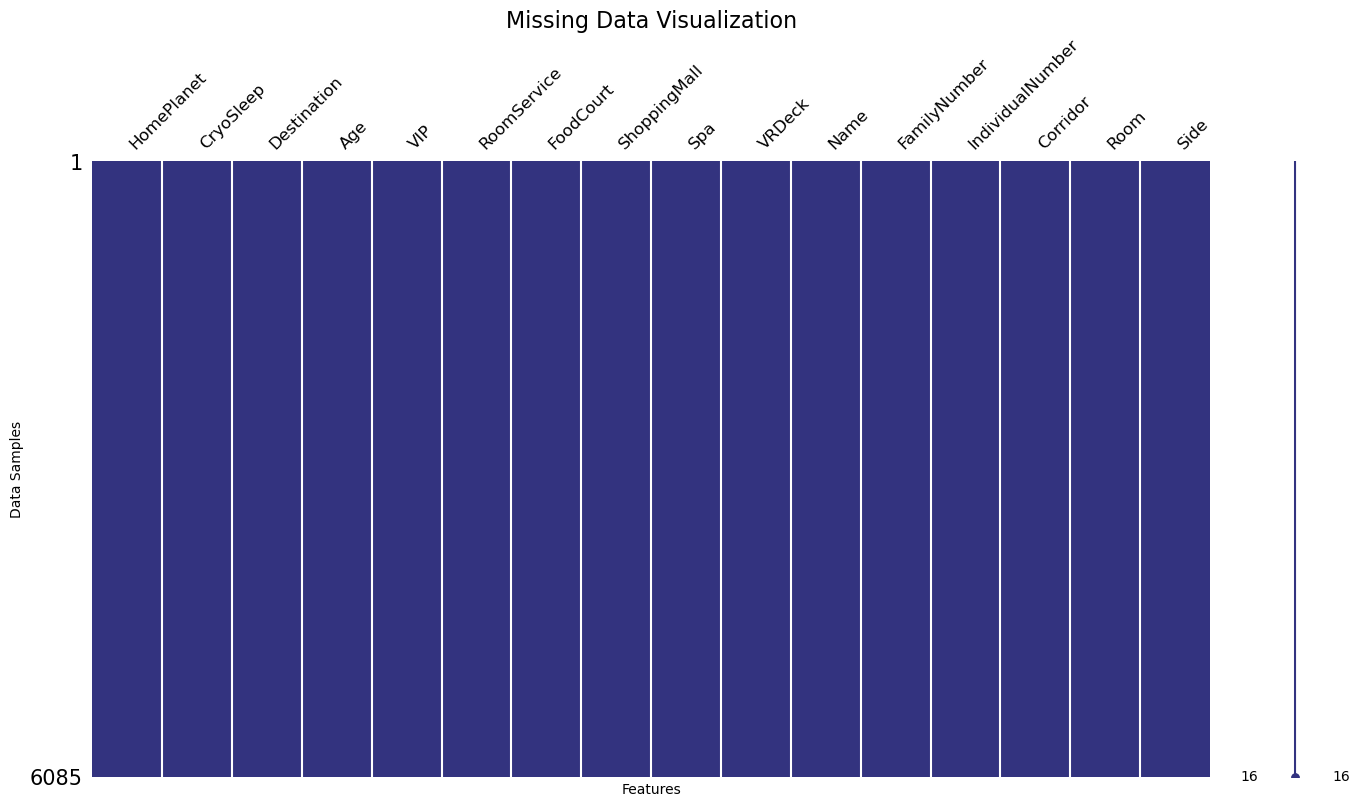

In [74]:
# Visualize missing data after inputations

# Droping (probably) redundant columns
df_clean=df.drop(columns=['PassengerId','Cabin'])

missingno.matrix(df_clean,figsize=(16,8), fontsize=12, color=(0.20, 0.20, 0.50))

# Customize plot labels and title
plt.xlabel('Features', fontsize=10)
plt.ylabel('Data Samples', fontsize=10)
plt.title('Missing Data Visualization', fontsize=16)


plt.show()

No missing data in the training part. Exporting...

In [75]:
# Export the DataFrame to a CSV file
df.to_csv('filled_train.csv', index=False)
# This will create a CSV file named 'filled_train.csv' to f# around in Excel.


### Part II

### 5. Treating test data

In [76]:
# Replaces missing values with 0 for passengers under 13 years old/CryoSleep
SERVICES = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
values = dict(zip(SERVICES, [0.0]*5))
values['VIP'] = False
X_val.loc[X_val.Age < 13] = X_val.loc[X_val.Age < 13].fillna(value=values)

values = dict(zip(SERVICES, [0.0]*5))
values['VIP'] = False
X_val.loc[X_val.CryoSleep == 1] = X_val.loc[X_val.CryoSleep == 1].fillna(value=values)

# Fill missing data under each AMENITIES column with the calculated mean values
for column in AMENITIES:
    X_val[column].fillna(mean_services[column], inplace=True)

for planet, prob in vip_prob_by_homeplanet.items():
    missing_mask = (X_val['HomePlanet'] == planet) & X_val['VIP'].isna()
    fill_values = np.random.choice([1, 0], size=missing_mask.sum(), p=[prob, 1 - prob])
    X_val.loc[missing_mask, 'VIP'] = fill_values

# Fill remaining missing values in the 'VIP' column with 0
X_val['VIP'] = X_val['VIP'].fillna(0)

# Fill missing Age values with the mean adult age
X_val['Age'] = X_val['Age'].fillna(int(round(mean_age,0)))

# Iterate through the missing 'Name' values and fill them with random names and surnames
for index, row in X_val[X_val['Name'].isnull()].iterrows():
    random_name = fake.first_name()
    random_surname = fake.last_name()
    full_name = f"{random_name} {random_surname}"

    # Fill the missing 'Name' value with the generated random name
    X_val.at[index, 'Name'] = full_name

In [77]:
# Iterate through the DataFrame
for index, row in X_val.iterrows():
    passenger_id = row['PassengerId']
    destination = row['Destination']

    # Check if the destination is missing (NaN) and PassengerId is not empty
    if pd.isna(destination) and len(str(passenger_id)) > 0:
        # Extract family number from PassengerId
        family_number = passenger_id.split('_')[0][:4]

        # Find related PassengerId with a valid destination from df DataFrame
        related_passenger_id = df.loc[(df['PassengerId'].str.contains(family_number)) &
                                       (~df['Destination'].isna()), 'PassengerId'].values

        # If there is a related PassengerId, fill the missing destination from df DataFrame
        if len(related_passenger_id) > 0:
            related_destination = df.loc[df['PassengerId'] == related_passenger_id[0], 'Destination'].values[0]
            X_val.at[index, 'Destination'] = related_destination

# Now X_val should have missing destinations filled based on related PassengerIds from df DataFrame

# Iterate through the X_val DataFrame
for index, row in X_val.iterrows():
    passenger_id = row['PassengerId']
    cryo_sleep = row['CryoSleep']

    # Check if CryoSleep is missing (NaN) and PassengerId is not empty
    if pd.isna(cryo_sleep) and len(str(passenger_id)) > 0:
        
        # Find related CryoSleep values for individuals with the same family number in the df DataFrame
        related_cryo_sleep_values = df.loc[df['PassengerId'].str.contains(family_number), 'CryoSleep'].dropna()

        # If there are related CryoSleep values in df, fill the missing CryoSleep in X_val based on majority
        if not related_cryo_sleep_values.empty:
            # Count True and False values
            true_count = related_cryo_sleep_values.sum()
            false_count = len(related_cryo_sleep_values) - true_count

            # Fill missing CryoSleep based on majority from df
            if true_count > false_count:
                X_val.at[index, 'CryoSleep'] = True
            elif false_count > true_count:
                X_val.at[index, 'CryoSleep'] = False

# Now X_val should have missing CryoSleep values filled based on majority from df

# Cabin missing data filling

# Iterate through the df DataFrame
for index, row in X_val.iterrows():
    passenger_id = row['PassengerId']
    cabin = row['Cabin']

    # Check if the cabin is missing (NaN) and PassengerId is not empty
    if pd.isna(cabin) and len(str(passenger_id)) > 0:
        
        # Find related PassengerId with a valid cabin in the df DataFrame
        related_cabins = df.loc[(df['PassengerId'].str.contains(family_number)), 'Cabin']

        # If there are related cabins, fill the missing cabin based on majority
        if not related_cabins.empty:
            # Count cabins with and without missing values
            cabins_with_values = related_cabins.dropna()
            cabins_without_values = len(related_cabins) - len(cabins_with_values)

            # Fill missing Cabin based on majority from related PassengerIds
            if cabins_with_values.count() > cabins_without_values:
                X_val.at[index, 'Cabin'] = cabins_with_values.mode().iloc[0]  # Fill with the mode value
            elif cabins_with_values.count() < cabins_without_values:
                X_val.at[index, 'Cabin'] = NaN  # No majority, so fill with NaN

# Now X_val should have missing Cabin values filled based on majority from related PassengerIds

# Iterate through the DataFrame
for index, row in X_val.iterrows():
    passenger_id = row['PassengerId']
    home_planet = row['HomePlanet']

    # Check if HomePlanet is missing (NaN) and PassengerId is not empty
    if pd.isna(home_planet) and len(str(passenger_id)) > 0:
       
        # Find related HomePlanet values for individuals with the same family number
        related_home_planet_values = df.loc[df['PassengerId'].str.contains(family_number), 'HomePlanet'].dropna()

        # If there are related HomePlanet values, fill the missing HomePlanet dfd on majority
        if not related_home_planet_values.empty:
            # Count unique values and their counts
            value_counts = related_home_planet_values.value_counts()

            # Get the most common value
            most_common_value = value_counts.index[0]

            # Fill missing HomePlanet with the most common value
            X_val.at[index, 'HomePlanet'] = most_common_value

# Now X_val should have missing HomePlanet values filled dfd on majority of related individuals in df

# Check if the sum of specified columns is zero
if X_val[AMENITIES].sum(axis=1).eq(0).any():
    # Fill missing CryoSleep values with True where the sum of specified columns is zero
    X_val.loc[X_val[AMENITIES].sum(axis=1).eq(0) & X_val['CryoSleep'].isna(), 'CryoSleep'] = True
    
# Filling randomly the missing data
# Create a mask for missing CryoSleep values
missing_cryosleep_mask = X_val['CryoSleep'].isna()

# Count the number of missing CryoSleep values
missing_cryosleep_count = missing_cryosleep_mask.sum()

# Calculate the number of True values based on the probability
num_true_values = int(probability_cryosleep * missing_cryosleep_count)

# Generate random True/False values based on the calculated probability
random_cryosleep_values = np.concatenate([np.ones(num_true_values), np.zeros(missing_cryosleep_count - num_true_values)])
np.random.shuffle(random_cryosleep_values)

# Fill missing CryoSleep values with the randomly generated values
X_val.loc[missing_cryosleep_mask, 'CryoSleep'] = random_cryosleep_values

In [78]:
# Filter rows with missing Cabin data
missing_rooms = X_val[X_val['Cabin'].isna()]

# Extract corridor, room number, and side from the 'Cabin' column in X_val
X_val['Corridor'] = X_val['Cabin'].apply(lambda x: x.split('/')[0] if pd.notnull(x) else None)
X_val['Room'] = X_val['Cabin'].apply(lambda x: x.split('/')[1] if pd.notnull(x) else None)
X_val['Side'] = X_val['Cabin'].apply(lambda x: x.split('/')[2] if pd.notnull(x) else None)

# Filling missing data with random possible rooms
import random

# Define valid options for Corridor, Room, and Side
valid_corridors = ['A', 'B', 'C', 'D', 'E', 'F', 'T']
valid_rooms = list(range(201))  # 0 to 200
valid_sides = ['B', 'S']

# Count the number of lines filled
filled_lines = 0

# Iterate through the missing values and fill them
for index, row in X_val[X_val['Corridor'].isna() | X_val['Room'].isna() | X_val['Side'].isna()].iterrows():
    # Generate random values
    random_corridor = random.choice(valid_corridors)
    random_room = random.choice(valid_rooms)
    random_side = random.choice(valid_sides)

    # Check if the combination already exists in X_val or df
    while ((X_val['Corridor'] == random_corridor) & (X_val['Room'] == random_room) & (X_val['Side'] == random_side)).any() or \
          ((df['Corridor'] == random_corridor) & (df['Room'] == random_room) & (df['Side'] == random_side)).any():
        random_corridor = random.choice(valid_corridors)
        random_room = random.choice(valid_rooms)
        random_side = random.choice(valid_sides)

    # Fill the missing values
    X_val.at[index, 'Corridor'] = random_corridor
    X_val.at[index, 'Room'] = random_room
    X_val.at[index, 'Side'] = random_side

    # Increment filled_lines count
    filled_lines += 1


In [79]:
# Extract features for rows with missing 'HomePlanet' values in X_val
X_unknown_new = X_val[X_val['HomePlanet'].isnull()][features]

# Use the trained model to predict missing 'HomePlanet' values
predicted_homeplanet_new = logreg_model.predict(X_unknown_new)

# Assign the predicted values back to X_val
X_val.loc[X_val['HomePlanet'].isnull(), 'HomePlanet'] = predicted_homeplanet_new

# Extract features for rows with missing 'Destination' values in X_val
X_unknown_new = X_val[X_val['Destination'].isnull()][features]

# Use the trained KNN model to predict missing 'Destination' values
predicted_destination_new = knn_model.predict(X_unknown_new)

# Assign the predicted values back to X_val
X_val.loc[X_val['Destination'].isnull(), 'Destination'] = predicted_destination_new


In [80]:
# Droping (probably) redundant columns
df=df.drop(columns=['PassengerId','Cabin'])
# Droping (probably) redundant columns
X_val=X_val.drop(columns=['PassengerId','Cabin'])


### 6. CrossValidation

#### 6.1 Hot Encoding

In [81]:
# Assuming 'HomePlanet' is the column you want to one-hot encode in your DataFrame df
# This will create new columns like 'HomePlanet_Earth', 'HomePlanet_Mars', 'HomePlanet_Europa' with 0 or 1 values, for example
df = pd.get_dummies(df, columns=['HomePlanet'], prefix='HomePlanet')
df = pd.get_dummies(df, columns=['Destination'], prefix='Destination')
df = pd.get_dummies(df, columns=['Side'], prefix='Side')
df = pd.get_dummies(df, columns=['Corridor'], prefix='Corridor')
X_val = pd.get_dummies(X_val, columns=['HomePlanet'], prefix='HomePlanet')
X_val = pd.get_dummies(X_val, columns=['Destination'], prefix='Destination')
X_val = pd.get_dummies(X_val, columns=['Side'], prefix='Side')
X_val = pd.get_dummies(X_val, columns=['Corridor'], prefix='Corridor')


In [82]:
# Assuming 'HomePlanet' is the column you want to one-hot encode in your DataFrame X_val
# This will create new columns like 'HomePlanet_Earth', 'HomePlanet_Mars', 'HomePlanet_Europa' with 0 or 1 values, for example


#### 6.1 Normalization

In [83]:
# Columns to be normalized using log scale
columns_to_normalize = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Apply log transformation and Min-Max normalization to df
min_vals = df[columns_to_normalize].min()
max_vals = df[columns_to_normalize].max()
df[columns_to_normalize] = (np.log1p(df[columns_to_normalize]) - min_vals) / (max_vals - min_vals)

# Apply the same log transformation and Min-Max normalization to X_val using min and max values from df
X_val[columns_to_normalize] = (np.log1p(X_val[columns_to_normalize]) - min_vals) / (max_vals - min_vals)



In [84]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,FamilyNumber,...,Side_P,Side_S,Corridor_A,Corridor_B,Corridor_C,Corridor_D,Corridor_E,Corridor_F,Corridor_G,Corridor_T
3032,0,43.0,0,0.000000,0.000262,0.000000,0.000240,0.000208,Sheratz Prighty,3282,...,False,True,False,True,False,False,False,False,False,False
7757,1,23.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,Zaurion Tractive,8276,...,True,False,False,False,True,False,False,False,False,False
1795,0,46.0,0,0.000153,0.000234,0.000000,0.000096,0.000187,Dia Cartez,1911,...,False,True,False,False,False,False,False,False,True,False
1702,0,33.0,0,0.000000,0.000239,0.000094,0.000059,0.000142,Rician Pollarkeeks,1808,...,False,True,False,False,False,False,False,True,False,False
6634,0,24.0,0,0.000000,0.000147,0.000274,0.000000,0.000155,Stany Hamberterry,6995,...,False,True,False,False,False,False,False,True,False,False


In [85]:
#df_cv=df.drop(columns=['HomePlanet','Destination', 'Side', 'Corridor', 'Name'])
#X_val_cv=X_val.drop(columns=['HomePlanet','Destination', 'Side', 'Corridor', 'Name'])
df_cv=df.drop(columns=['Name'])
X_val_cv=X_val.drop(columns=['Name'])

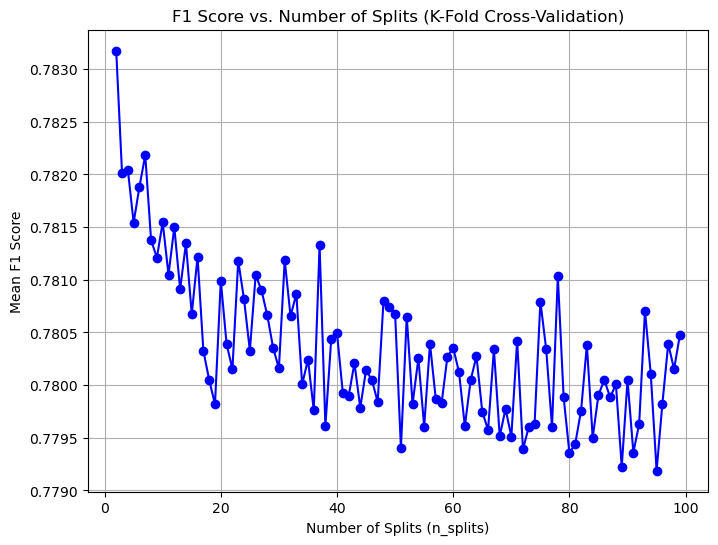

In [86]:
# Create a StandardScaler object
scaler = StandardScaler()

# Scale your training data (df_cv) and testing data (X_val_cv)
df_cv_scaled = scaler.fit_transform(df_cv)
X_val_cv_scaled = scaler.transform(X_val_cv)

# Define a range of n_splits values to explore
n_splits_values = np.arange(2, 15)  # Range from 2 to 100

# Initialize an empty list to store mean F1 scores
mean_f1_scores = []

# Iterate over different n_splits values and calculate mean F1 scores
for n_splits in n_splits_values:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    logreg_model = LogisticRegression(max_iter=10000)
    f1_scores = cross_val_score(logreg_model, df_cv_scaled, y_df, cv=kfold, scoring='f1_weighted')
    mean_f1_scores.append(f1_scores.mean())

# Plot F1 scores against n_splits
plt.figure(figsize=(8, 6))
plt.plot(n_splits_values, mean_f1_scores, marker='o', linestyle='-', color='b')
plt.title('F1 Score vs. Number of Splits (K-Fold Cross-Validation)')
plt.xlabel('Number of Splits (n_splits)')
plt.ylabel('Mean F1 Score')
plt.grid(True)
plt.show()


In [88]:
# Create a StandardScaler object
scaler = StandardScaler()

# Scale your training data (df_cv) and testing data (X_val_cv)
df_cv_scaled = scaler.fit_transform(df_cv)
X_val_cv_scaled = scaler.transform(X_val_cv)

# Initialize K-Fold cross-validator with 5 folds
kfold = KFold(n_splits=25, shuffle=True, random_state=42)

# Create a logistic regression model with increased max_iter
logreg_model = LogisticRegression(max_iter=10000)

# Perform K-Fold cross-validation and calculate precision, recall, and F1 scores
precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)
f1_scorer = make_scorer(f1_score)
cross_val_precision_scores = cross_val_score(logreg_model, df_cv_scaled, y_df, cv=kfold, scoring=precision_scorer)
cross_val_recall_scores = cross_val_score(logreg_model, df_cv_scaled, y_df, cv=kfold, scoring=recall_scorer)
cross_val_f1_scores = cross_val_score(logreg_model, df_cv_scaled, y_df, cv=kfold, scoring=f1_scorer)


# Train the model on the entire scaled training data (df_cv_scaled and y_df)
logreg_model.fit(df_cv_scaled, y_df)

# Evaluate the model on the scaled test data (X_val_cv_scaled and y_val)
test_precision = precision_score(y_val, logreg_model.predict(X_val_cv_scaled))
test_recall = recall_score(y_val, logreg_model.predict(X_val_cv_scaled))
test_f1_score = f1_score(y_val, logreg_model.predict(X_val_cv_scaled))

# Print the Cross-Validation Precision, Recall, and F1 Scores, and their Means
#print("Cross-Validation Precision Scores:", cross_val_precision_scores)
print("Mean Precision:", cross_val_precision_scores.mean())
#print("Cross-Validation Recall Scores:", cross_val_recall_scores)
print("Mean Recall:", cross_val_recall_scores.mean())
#print("Cross-Validation F1 Scores:", cross_val_f1_scores)
print("Mean F1 Score:", cross_val_f1_scores.mean())
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)


Mean Precision: 0.7746796170369069
Mean Recall: 0.7952515101644838
Mean F1 Score: 0.7841779260360675
Test Precision: 0.760200429491768
Test Recall: 0.8051554207733131
Test F1 Score: 0.7820324005891016


##### Mean Precision (Cross-Validation):
    Mean Precision represents the average precision score calculated across all folds during cross-validation. Precision measures the ratio of correctly predicted positive observations to the total predicted positives. In this context, it means that, on average, about 77.52% of the instances predicted as positive by the model during cross-validation were actually positive.

##### Mean Recall (Cross-Validation):
    Mean Recall represents the average recall score calculated across all folds during cross-validation. Recall (also known as sensitivity or true positive rate) measures the ratio of correctly predicted positive observations to all the actual positives. A mean recall of about 79.46% indicates that, on average, the model captured approximately 79.46% of all actual positive instances during cross-validation.

##### Mean F1 Score (Cross-Validation):
    Mean F1 Score represents the average F1 score calculated across all folds during cross-validation. F1 score is the harmonic mean of precision and recall. It gives a balance between precision and recall. A mean F1 score of about 78.41% suggests that, on average, the model achieved a balance between precision and recall, with 78.41% being the harmonic mean of precision and recall.

##### Test Precision:
    Test Precision represents the precision score calculated on the test dataset. It means that, out of all instances predicted as positive by the model on the test data, approximately 75.99% were true positive instances.

##### Test Recall:
    Test Recall represents the recall score calculated on the test dataset. It indicates that about 80.36% of all actual positive instances in the test data were correctly identified by the model.

##### Test F1 Score:
    Test F1 Score represents the F1 score calculated on the test dataset. Similar to the mean F1 score, it represents the balance between precision and recall on the test data. A test F1 score of about 78.11% suggests that the model achieved a balance between precision and recall, with 78.11% being the harmonic mean of precision and recall on the test data.